# BC 3: Investment replica

In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configure visualization settings
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

path = Path("Dataset3_PortfolioReplicaStrategy.xlsx")

# load data


In [2]:
full_names_df = pd.read_excel(path, header=None, skiprows=3, nrows=1)
full_names = full_names_df.iloc[0].tolist()[1:]  # Skip the first column (date column)

# Read Bloomberg tickers (row 6)
tickers_df = pd.read_excel(path, header=None, skiprows=5, nrows=1)
tickers = tickers_df.iloc[0].tolist()[1:]  # Skip the first column (date column)

# Create a dictionary mapping tickers to full names
variable_info = dict(zip(tickers, full_names))


# Read the actual data without using any row as a header
data_raw = pd.read_excel(path, header=None, skiprows=6)

# First column is the date column
data_raw.columns = ['Date'] + tickers  # Assign the columns correctly using tickers

# Set the date column as the index and ensure it's in datetime format
data_raw['Date'] = pd.to_datetime(data_raw['Date'], format='%d/%m/%Y')
data = data_raw.set_index('Date')

# Display the first few rows to examine the dataset structure
print("Dataset preview:")
display(data.head())

# Show the variable information (Ticker -> Full Name)
print("\nVariable Information (Bloomberg Ticker -> Full Name):")
for ticker, name in variable_info.items():
    print(f"{ticker} -> {name}")

# Display statistical summary of the dataset
print("\nBasic statistics:")
display(data.describe())


Dataset preview:


MXWO Index  MXWD Index  LEGATRUU Index  HFRXGL Index  RX1 Comdty  \
Date                                                                           
2007-10-23     1633.44      414.14        350.2138       1343.63      113.70   
2007-10-30     1663.89      423.26        352.5413       1356.53      113.79   
2007-11-06     1651.59      419.51        354.1758       1360.20      113.79   
2007-11-13     1601.81      405.98        357.2217       1347.16      114.35   
2007-11-20     1570.74      398.54        359.4446       1335.21      114.72   

            TY1 Comdty  GC1 Comdty  CO1 Comdty  ES1 Comdty  VG1 Comdty  \
Date                                                                     
2007-10-23  110.515625       759.0       82.85     1525.50      4393.0   
2007-10-30  110.656250       787.8       87.44     1536.00      4476.0   
2007-11-06  110.875000       823.4       93.26     1525.00      4425.0   
2007-11-13  111.718750       799.0       88.83     1483.25      4323.0   
2007-11-20  113.156250       791.4       95.49     1446.00      4296.0   

            NQ1 Comdty  LLL1 Comdty  TP1 Comdty  DU1 Comdty  TU2 Comdty  
Date                                                                     
2007-10-23     2212.00       1287.0      1570.5     103.385  103.718750  
2007-10-30     2217.75       1323.9      1610.5     103.410  103.812500  
2007-11-06     2233.50       1320.0      1575.5     103.410  104.046875  
2007-11-13     2066.75       1271.0      1440.5     103.595  104.304688  
2007-11-20     2035.50       1225.2      1472.5     103.800  104.945312


Variable Information (Bloomberg Ticker -> Full Name):
MXWO Index -> MSCI WORLD
MXWD Index -> MSCI ACWI
LEGATRUU Index -> Global Aggregate
HFRXGL Index -> Hedge Fund Research HFRX Globa
RX1 Comdty -> Generic 1st 'RX' Future
TY1 Comdty -> Generic 1st 'TY' Future
GC1 Comdty -> Generic 1st 'GC' Future
CO1 Comdty -> Generic 1st 'CO' Future
ES1 Comdty -> Generic 1st 'ES' Future
VG1 Comdty -> Generic 1st 'VG' Future
NQ1 Comdty -> Generic 1st 'NQ' Future
LLL1 Comdty -> Generic 1st 'LLL' Future
TP1 Comdty -> Generic 1st 'TP' Future
DU1 Comdty -> Generic 1st 'DU' Future
TU2 Comdty -> Generic 2nd 'TU' Future

Basic statistics:


MXWO Index  MXWD Index  LEGATRUU Index  HFRXGL Index  RX1 Comdty  \
count   705.00000  705.000000      705.000000    705.000000  705.000000   
mean   1644.12566  404.151915      452.203206   1210.092071  147.278837   
std     443.39041  100.980126       47.338067     73.965200   19.318527   
min     705.35000  176.100000      342.247100   1021.400000  110.200000   
25%    1293.43000  328.790000      431.737400   1158.150000  128.900000   
50%    1646.69000  402.570000      456.728800   1215.200000  148.000000   
75%    1978.83000  478.410000      478.186800   1254.250000  163.240000   
max    2944.05000  702.990000      559.311700   1415.110000  179.320000   

       TY1 Comdty   GC1 Comdty  CO1 Comdty   ES1 Comdty   VG1 Comdty  \
count  705.000000   705.000000  705.000000   705.000000   705.000000   
mean   125.966977  1317.902837   77.018496  1960.443050  3072.167631   
std      6.295242   274.477979   26.794278   770.070634   473.812729   
min    110.515625   732.700000   19.330000   689.500000  1873.000000   
25%    121.203125  1178.000000   54.270000  1314.500000  2753.000000   
50%    126.000000  1283.000000   72.050000  1909.250000  3071.000000   
75%    130.343750  1499.700000  105.780000  2569.750000  3433.000000   
max    140.328125  2001.200000  140.670000  4132.800000  4476.000000   

         NQ1 Comdty  LLL1 Comdty   TP1 Comdty  DU1 Comdty  TU2 Comdty  
count    705.000000   705.000000   705.000000  705.000000  705.000000  
mean    4526.981206  1064.444113  1277.263121  110.221277  108.627682  
std     2900.866833   128.954655   353.598276    2.374875    1.532632  
min     1072.000000   465.100000   704.000000  102.190000  103.718750  
25%     2244.000000  1103.600000   905.000000  109.230000  107.871094  
50%     3884.750000  1103.600000  1302.500000  110.855000  109.093750  
75%     6333.250000  1103.600000  1587.500000  111.990000  109.906250  
max    13975.750000  1323.900000  1978.000000  112.720000  110.527344

# EDA 

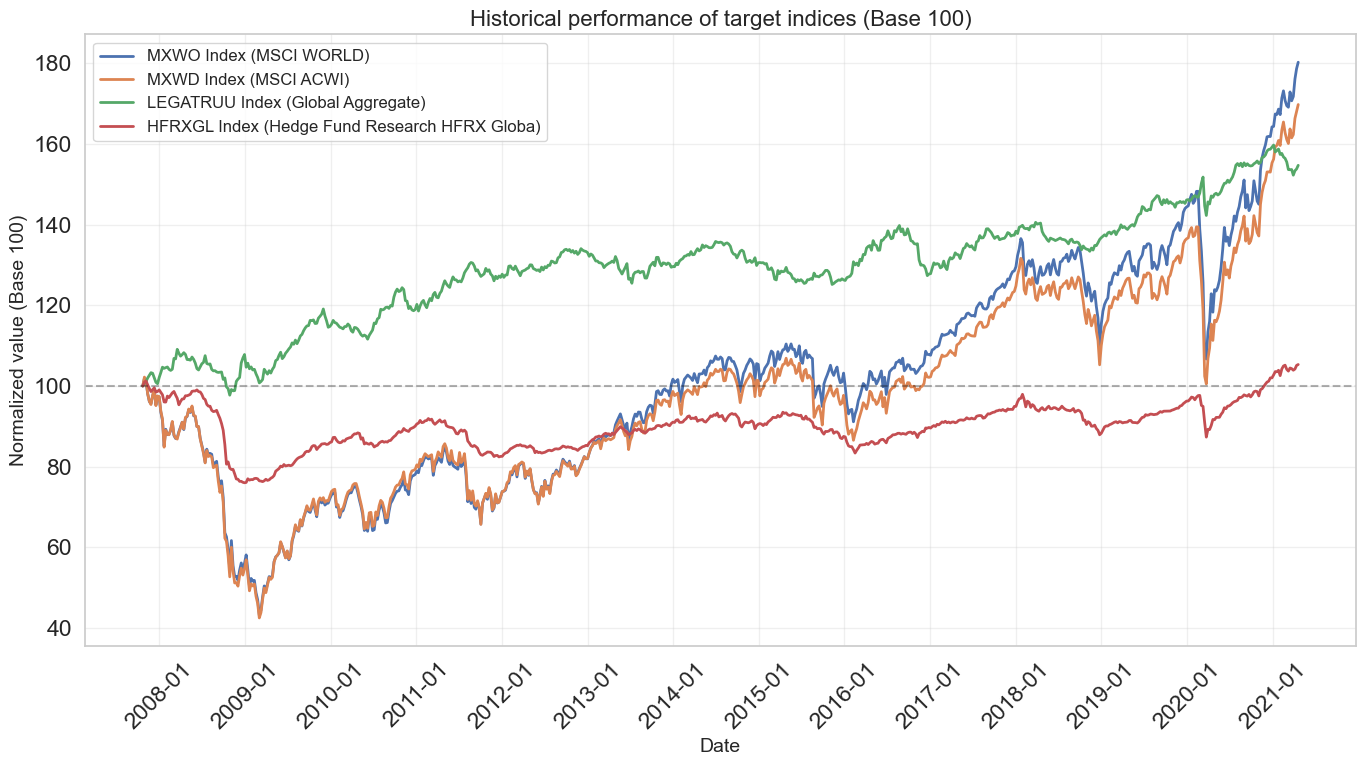


Return statistics for target indices:


Annualized Return Annualized Volatility  Sharpe Ratio  \
MXWO Index                 5.90%                17.52%      0.336955   
MXWD Index                 5.51%                17.78%      0.309683   
LEGATRUU Index             3.37%                 5.34%      0.630472   
HFRXGL Index               0.50%                 4.78%      0.104156   

               Max Drawdown  Skewness   Kurtosis  
MXWO Index          -57.61% -0.682289   4.357034  
MXWD Index          -58.39% -0.641270   4.663275  
LEGATRUU Index      -10.41% -0.329675   4.118169  
HFRXGL Index        -24.91% -2.301318  13.702270

In [3]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Target indices to explore
target_indices = ['MXWO Index', 'MXWD Index', 'LEGATRUU Index', 'HFRXGL Index']

# Create a figure for the historical price series
plt.figure(figsize=(14, 8))

# Plot each index
for idx in target_indices:
    # Normalize to 100 at the beginning for comparison
    normalized_series = data[idx] / data[idx].iloc[0] * 100
    plt.plot(normalized_series.index, normalized_series, linewidth=2, label=f"{idx} ({variable_info.get(idx, idx)})")

# Format the plot
plt.title('Historical performance of target indices (Base 100)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Normalized value (Base 100)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=12)

# Format the x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

# Add a horizontal line at y=100
plt.axhline(y=100, color='black', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and display statistics for all indices
print("\nReturn statistics for target indices:")
# Calculate returns
returns = data[target_indices].pct_change().dropna()

# Calculate annualized statistics (assuming weekly data)
annual_factor = 52  # For weekly data (52 weeks = 1 year)

# Format as percentage with 2 decimal places
def format_pct(x):
    return f"{x*100:.2f}%"

stats = pd.DataFrame({
    'Annualized Return': returns.mean() * annual_factor,
    'Annualized Volatility': returns.std() * np.sqrt(annual_factor),
    'Sharpe Ratio': (returns.mean() * annual_factor) / (returns.std() * np.sqrt(annual_factor)),
    'Max Drawdown': returns.apply(lambda x: (1 + x).cumprod().div((1 + x).cumprod().cummax()) - 1).min(),
    'Skewness': returns.skew(),
    'Kurtosis': returns.kurtosis()
})

# Convert some columns to percentage format for better readability
for col in ['Annualized Return', 'Annualized Volatility', 'Max Drawdown']:
    stats[col] = stats[col].apply(format_pct)

display(stats)


# correlation analysis

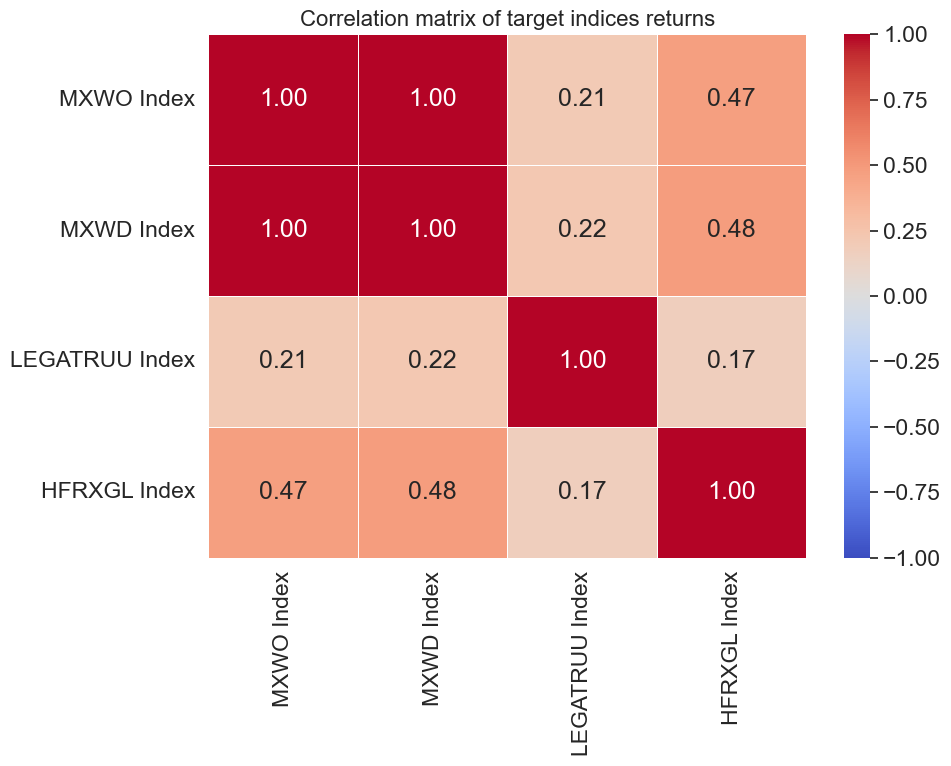

In [4]:
# Create a correlation heatmap for the target indices
plt.figure(figsize=(10, 8))
correlation_matrix = returns[target_indices].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            linewidths=0.5, fmt='.2f')
plt.title('Correlation matrix of target indices returns', fontsize=16)
plt.tight_layout()
plt.show()


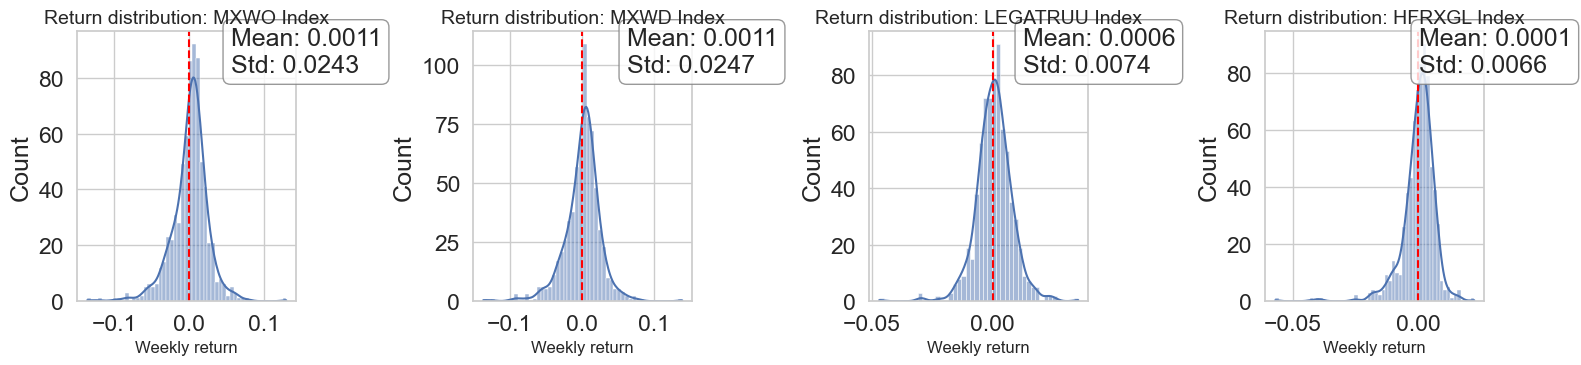

In [5]:


# Plot returns distribution
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes = axes.flatten()

for i, idx in enumerate(target_indices):
    sns.histplot(returns[idx], kde=True, ax=axes[i])
    axes[i].set_title(f'Return distribution: {idx}', fontsize=14)
    axes[i].set_xlabel('Weekly return', fontsize=12)
    axes[i].axvline(x=0, color='red', linestyle='--')
    # Add mean and std annotations
    mean = returns[idx].mean()
    std = returns[idx].std()
    axes[i].annotate(f'Mean: {mean:.4f}\nStd: {std:.4f}',
                     xy=(0.7, 0.85), xycoords='axes fraction',
                     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

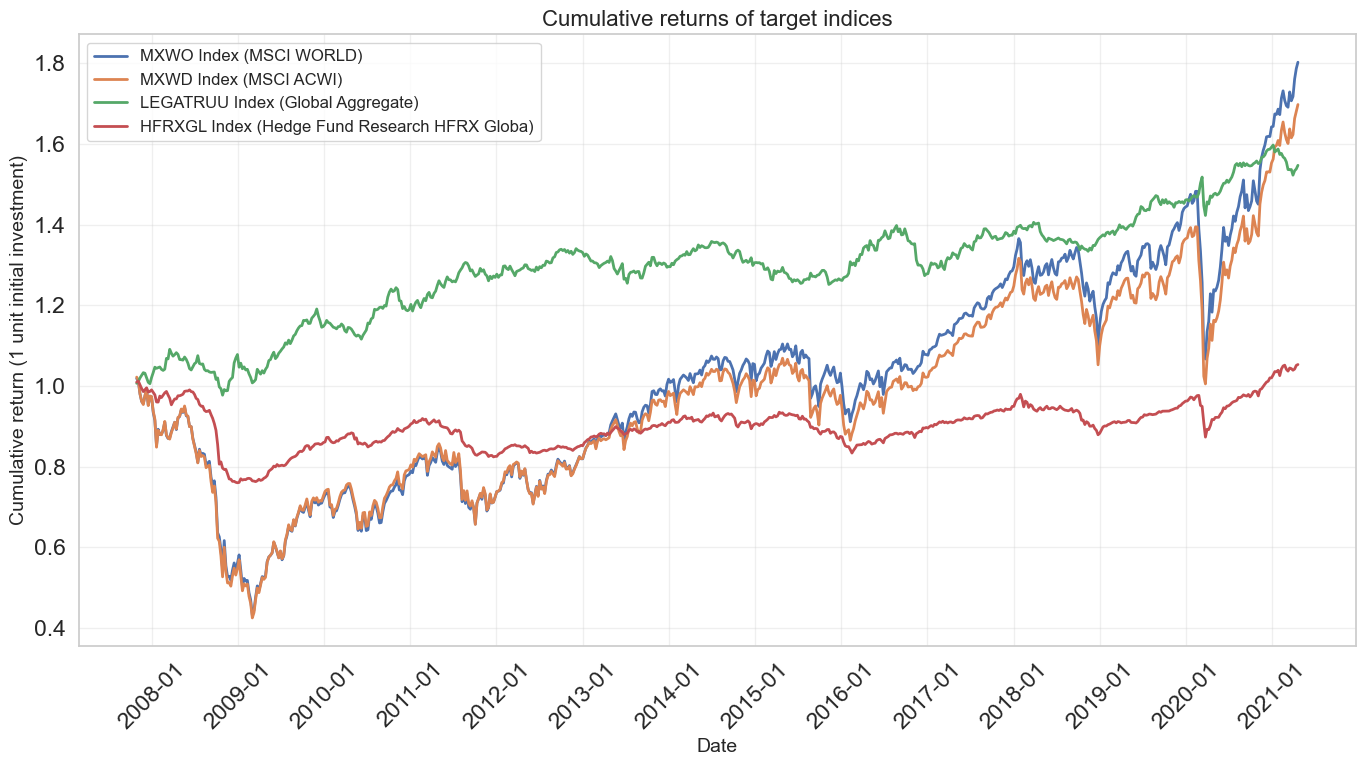

In [6]:
# Compute cumulative returns for visualization
cumulative_returns = (1 + returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 8))
for idx in target_indices:
    plt.plot(cumulative_returns.index, cumulative_returns[idx], linewidth=2,
             label=f"{idx} ({variable_info.get(idx, idx)})")

plt.title('Cumulative returns of target indices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative return (1 unit initial investment)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=12)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

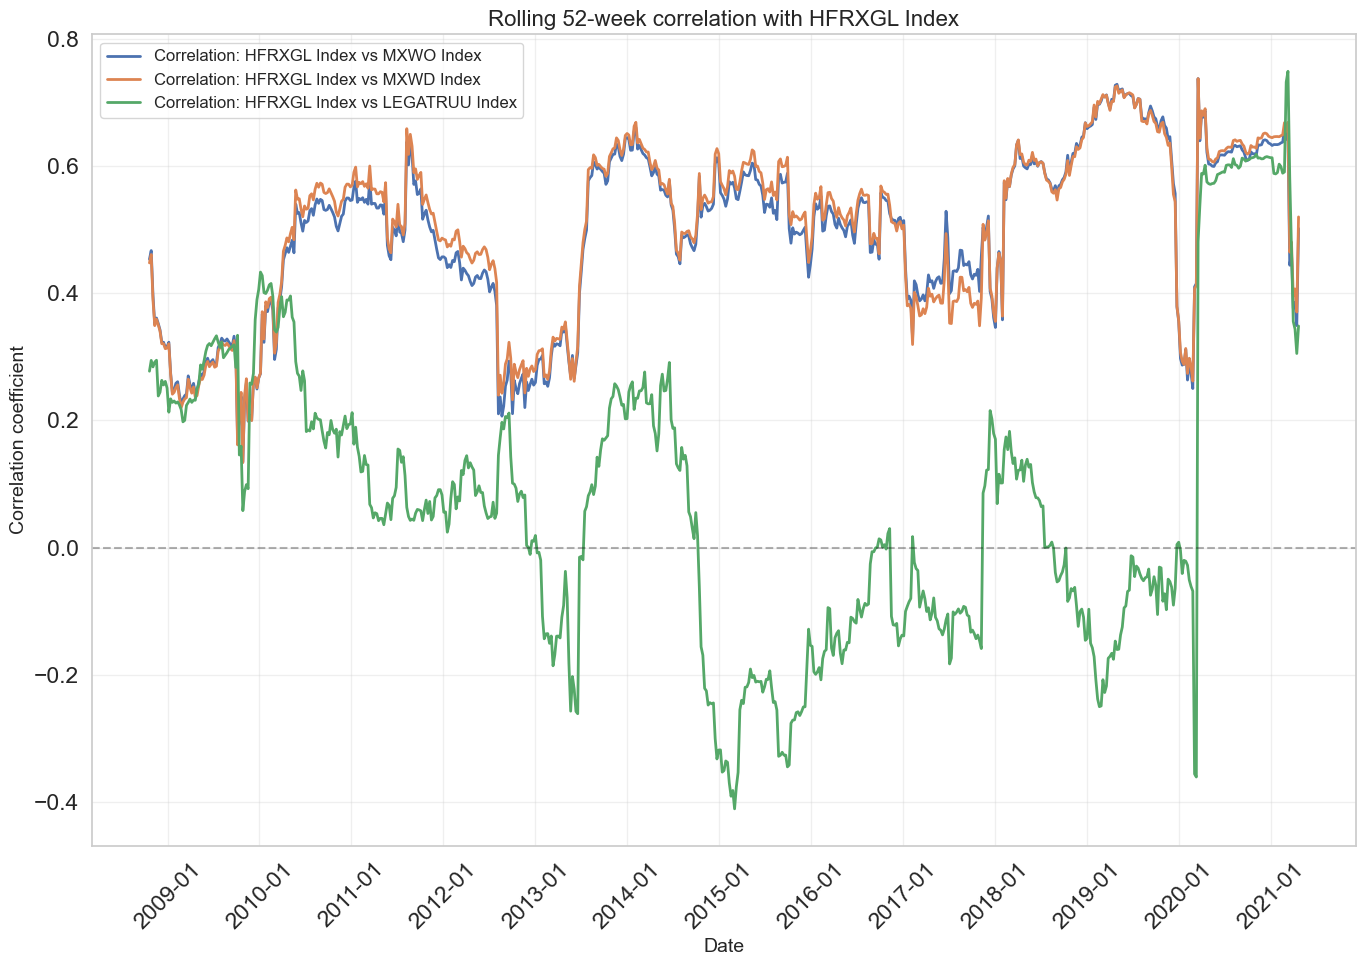

In [7]:
# Plot rolling correlations over time (12-month window)
rolling_window = 52  # 52 weeks ≈ 1 year
plt.figure(figsize=(14, 10))

# Base correlation against HFRXGL (Hedge Fund Index)
base_idx = 'HFRXGL Index'
for idx in [i for i in target_indices if i != base_idx]:
    roll_corr = returns[[base_idx, idx]].rolling(rolling_window).corr().unstack()[base_idx][idx]
    plt.plot(roll_corr.index, roll_corr, linewidth=2,
             label=f"Correlation: {base_idx} vs {idx}")

plt.title(f'Rolling {rolling_window}-week correlation with {base_idx}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Correlation coefficient', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=12)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---> HERE DEFINITION OF "MONSTER" INDEX <-----

Normality testing for our target indices

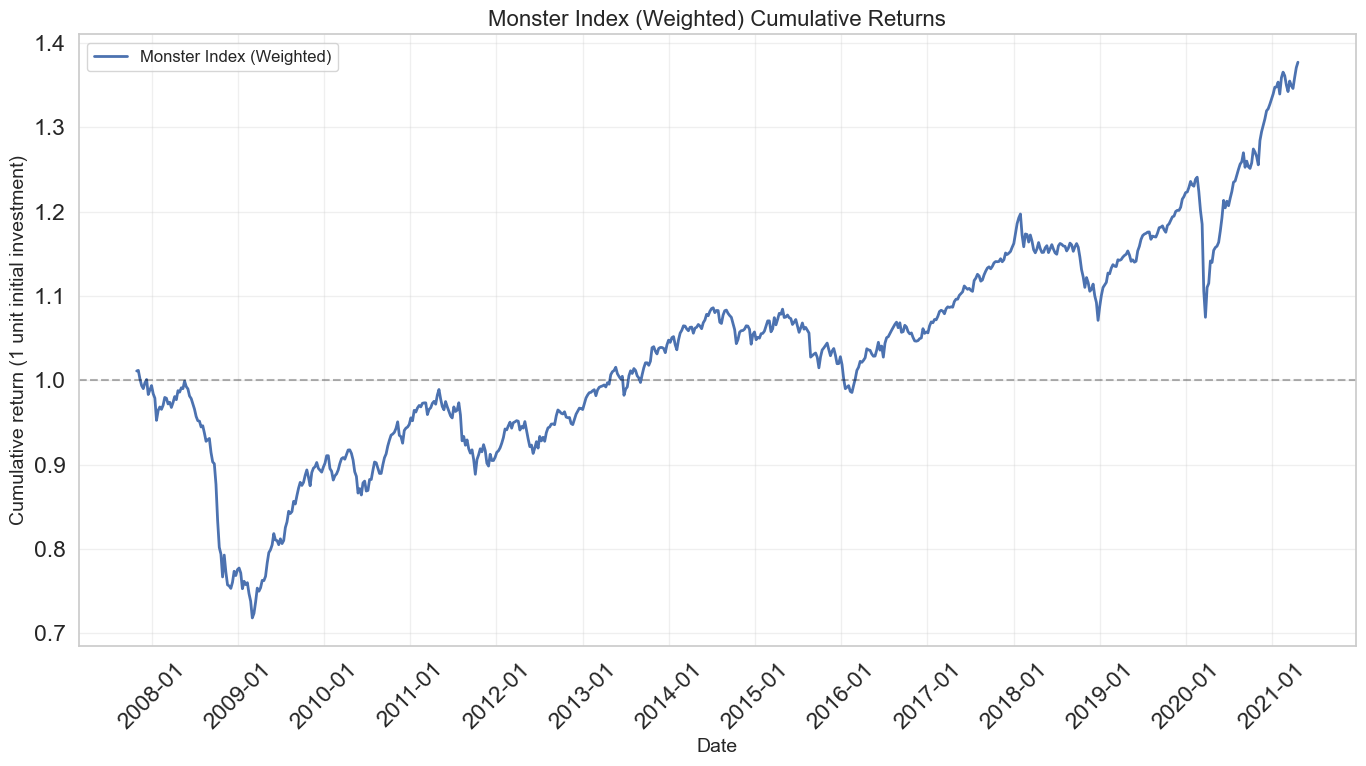

In [8]:
import warnings

# Suppress specific boring RuntimeWarnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

# Define the components of our target index with their weights
# You can be creative, this is just an example

# Monster Index (a crazy combination of large indexes)
index_components = {
    'HFRXGL Index': 0.5,   # Hedge Fund Index - 50%
    'MXWO Index': 0.25,     # MSCI World - 25%
    'LEGATRUU Index': 0.25  # Global Aggregate Bond - 25%
}


# Calculate returns for each component
component_returns = data[list(index_components.keys())].pct_change().dropna()    # (current_price - previous_price) / previous_price).

# Create the target index using weighted returns
weighted_returns = pd.DataFrame(index=component_returns.index)
for component, weight in index_components.items():
    weighted_returns[component] = component_returns[component] * weight

# Sum the weighted returns to get the target index returns
target_returns = weighted_returns.sum(axis=1)
target_returns.name = 'Target_Index'

# plot monster index

plt.figure(figsize=(14, 8))
plt.plot((1 + target_returns).cumprod(), linewidth=2, label='Monster Index (Weighted)')
plt.title('Monster Index (Weighted) Cumulative Returns', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative return (1 unit initial investment)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=12)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.axhline(y=1, color='black', linestyle='--', alpha=0.3)  # Horizontal line at y=1 (100%)
plt.tight_layout()
plt.show()

Futures returns shape: (704, 11)


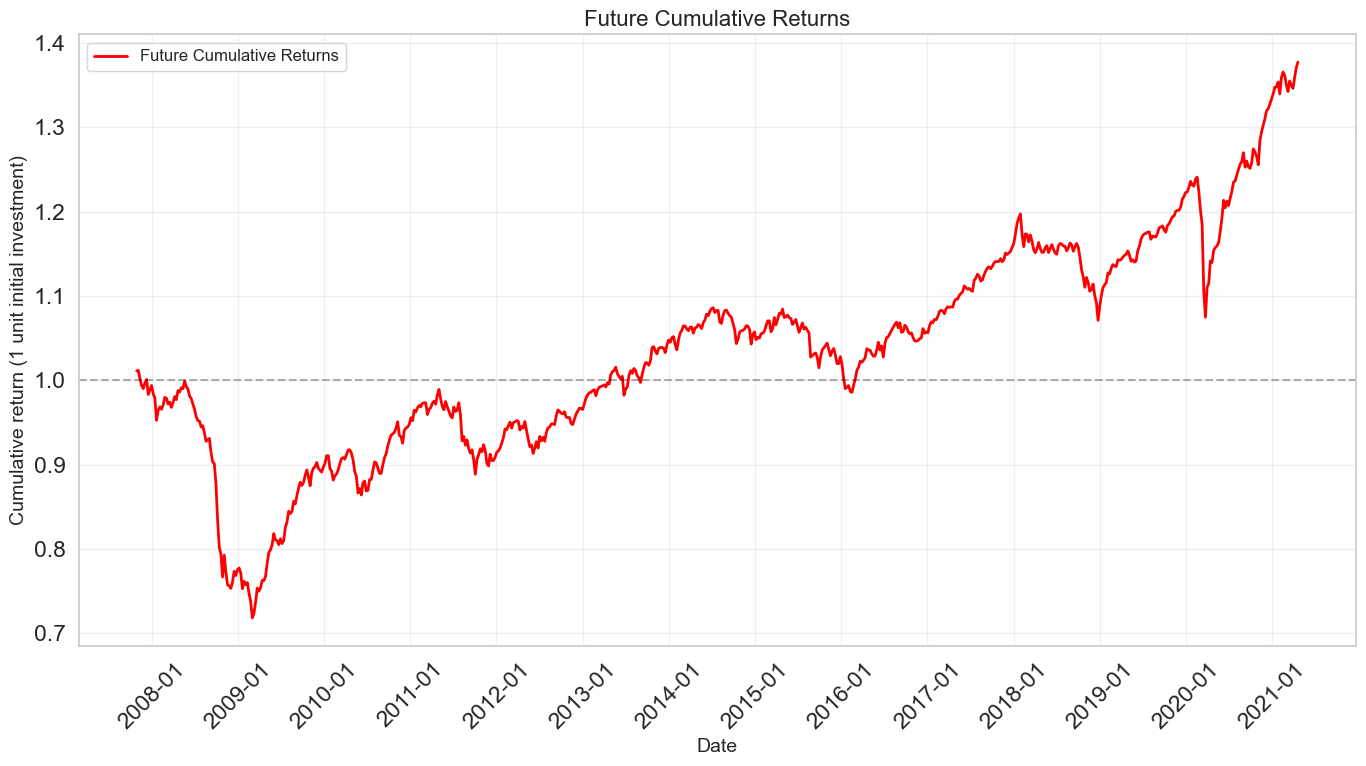

In [9]:
# Define the futures contracts we'll use for replication
futures_contracts = [
    'RX1 Comdty', 'TY1 Comdty', 'GC1 Comdty', 'CO1 Comdty',
    'ES1 Comdty', 'VG1 Comdty', 'NQ1 Comdty', 'LLL1 Comdty',
    'TP1 Comdty', 'DU1 Comdty', 'TU2 Comdty'
]

# Calculate returns for futures contracts
futures_returns = data[futures_contracts].pct_change().dropna()

# Ensure we're using the same date range for both target and futures
common_dates = futures_returns.index.intersection(target_returns.index)
futures_returns = futures_returns.loc[common_dates]
target_returns_aligned = target_returns.loc[common_dates]
#check dimensions
print(f"Futures returns shape: {futures_returns.shape}")

# Plot the returns of the target index and futures contracts
plt.figure(figsize=(14, 8))
plt.plot((1 + target_returns_aligned).cumprod(), linewidth=2, label='Future Cumulative Returns',color='red')
plt.title('Future Cumulative Returns', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative return (1 unit initial investment)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=12)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.axhline(y=1, color='black', linestyle='--', alpha=0.3)  # Horizontal line at y=1 (100%)
plt.tight_layout()
plt.show()

# Calculate correlations between target index and futures contracts using pandas method
# which handles NaN values better than np.corrcoef
correlations = pd.DataFrame(index=futures_contracts,
                           columns=['Correlation with target index'])

for contract in futures_contracts:
    correlations.loc[contract] = target_returns_aligned.corr(futures_returns[contract])

# Sort by absolute correlation value
correlations['Abs correlation'] = correlations['Correlation with target index'].abs()
correlations = correlations.sort_values('Abs correlation', ascending=False)
correlations = correlations.drop('Abs correlation', axis=1)


Shapiro-Wilk test for Target index:
  Statistic = 0.9174, p-value = 3.7258e-19 -> Normality rejected

Shapiro-Wilk test for ES1 Comdty:
  Statistic = 0.9259, p-value = 3.9159e-18 -> Normality rejected

Shapiro-Wilk test for NQ1 Comdty:
  Statistic = 0.9492, p-value = 7.7878e-15 -> Normality rejected

Shapiro-Wilk test for VG1 Comdty:
  Statistic = 0.9586, p-value = 3.4350e-13 -> Normality rejected



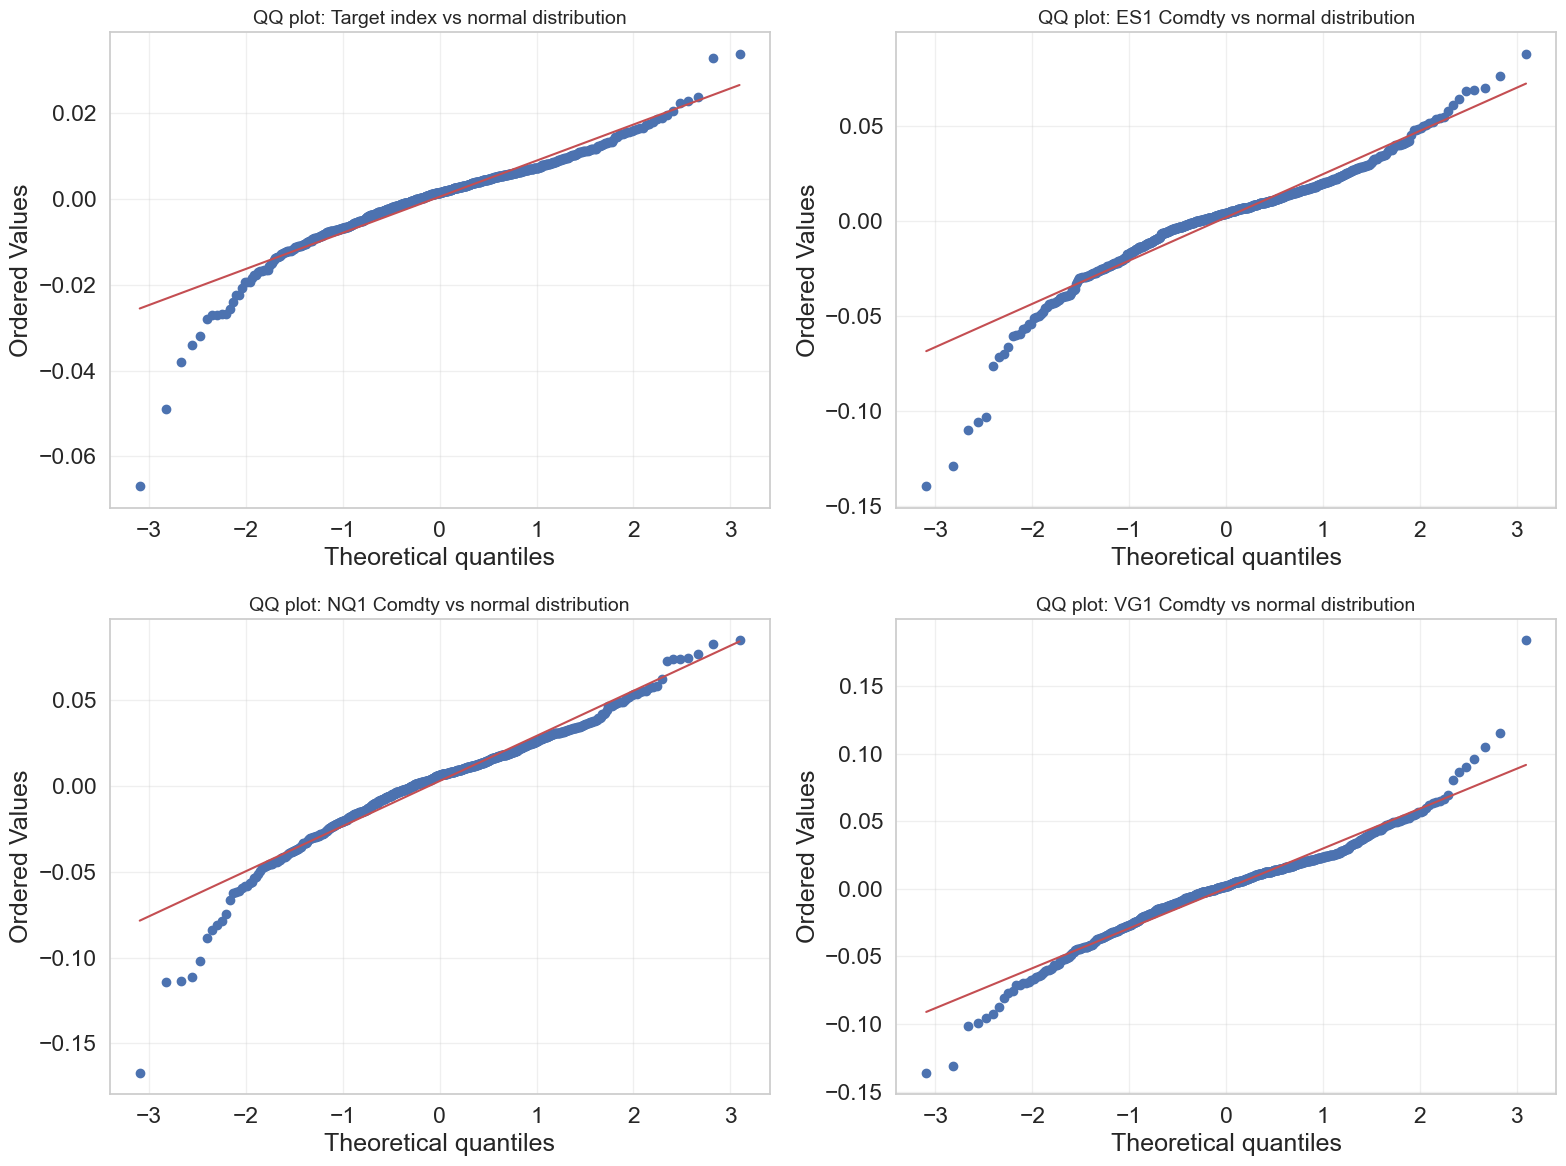

In [10]:
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

# Create figure for QQ plots
plt.figure(figsize=(16, 12))

# 1) QQ plot & Shapiro test for the target index
plt.subplot(2, 2, 1)
stats.probplot(target_returns_aligned.dropna(), dist="norm", plot=plt)
plt.title('QQ plot: Target index vs normal distribution', fontsize=14)
plt.grid(True, alpha=0.3)

# Perform Shapiro-Wilk test for the target index
shapiro_stat, shapiro_p = stats.shapiro(target_returns_aligned.dropna())
if shapiro_p < 0.05:
    result_message = "Normality rejected"
else:
    result_message = "Normality not rejected"
print(f"Shapiro-Wilk test for Target index:")
print(f"  Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4e} -> {result_message}\n")

# 2) Select a few key futures contracts (top 3 by correlation)
top_futures = correlations.index[:3].tolist()

# 3) QQ plots & Shapiro tests for top futures
for i, contract in enumerate(top_futures):
    plt.subplot(2, 2, i + 2)
    
    returns_data = futures_returns[contract].dropna()
    stats.probplot(returns_data, dist="norm", plot=plt)
    
    plt.title(f'QQ plot: {contract} vs normal distribution', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Perform Shapiro-Wilk test for each futures contract
    shapiro_stat, shapiro_p = stats.shapiro(returns_data)
    if shapiro_p < 0.05:
        result_message = "Normality rejected"
    else:
        result_message = "Normality not rejected"
    print(f"Shapiro-Wilk test for {contract}:")
    print(f"  Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4e} -> {result_message}\n")

plt.tight_layout()
plt.show()


In [11]:
# Print the top correlated futures, just for reference
print("Top futures contracts by correlation with target index:")
display(correlations.head())

Top futures contracts by correlation with target index:


Correlation with target index
ES1 Comdty                       0.837925
NQ1 Comdty                       0.746908
VG1 Comdty                       0.730608
TP1 Comdty                       0.598764
LLL1 Comdty                      0.498685

# Autocorrelation analysis

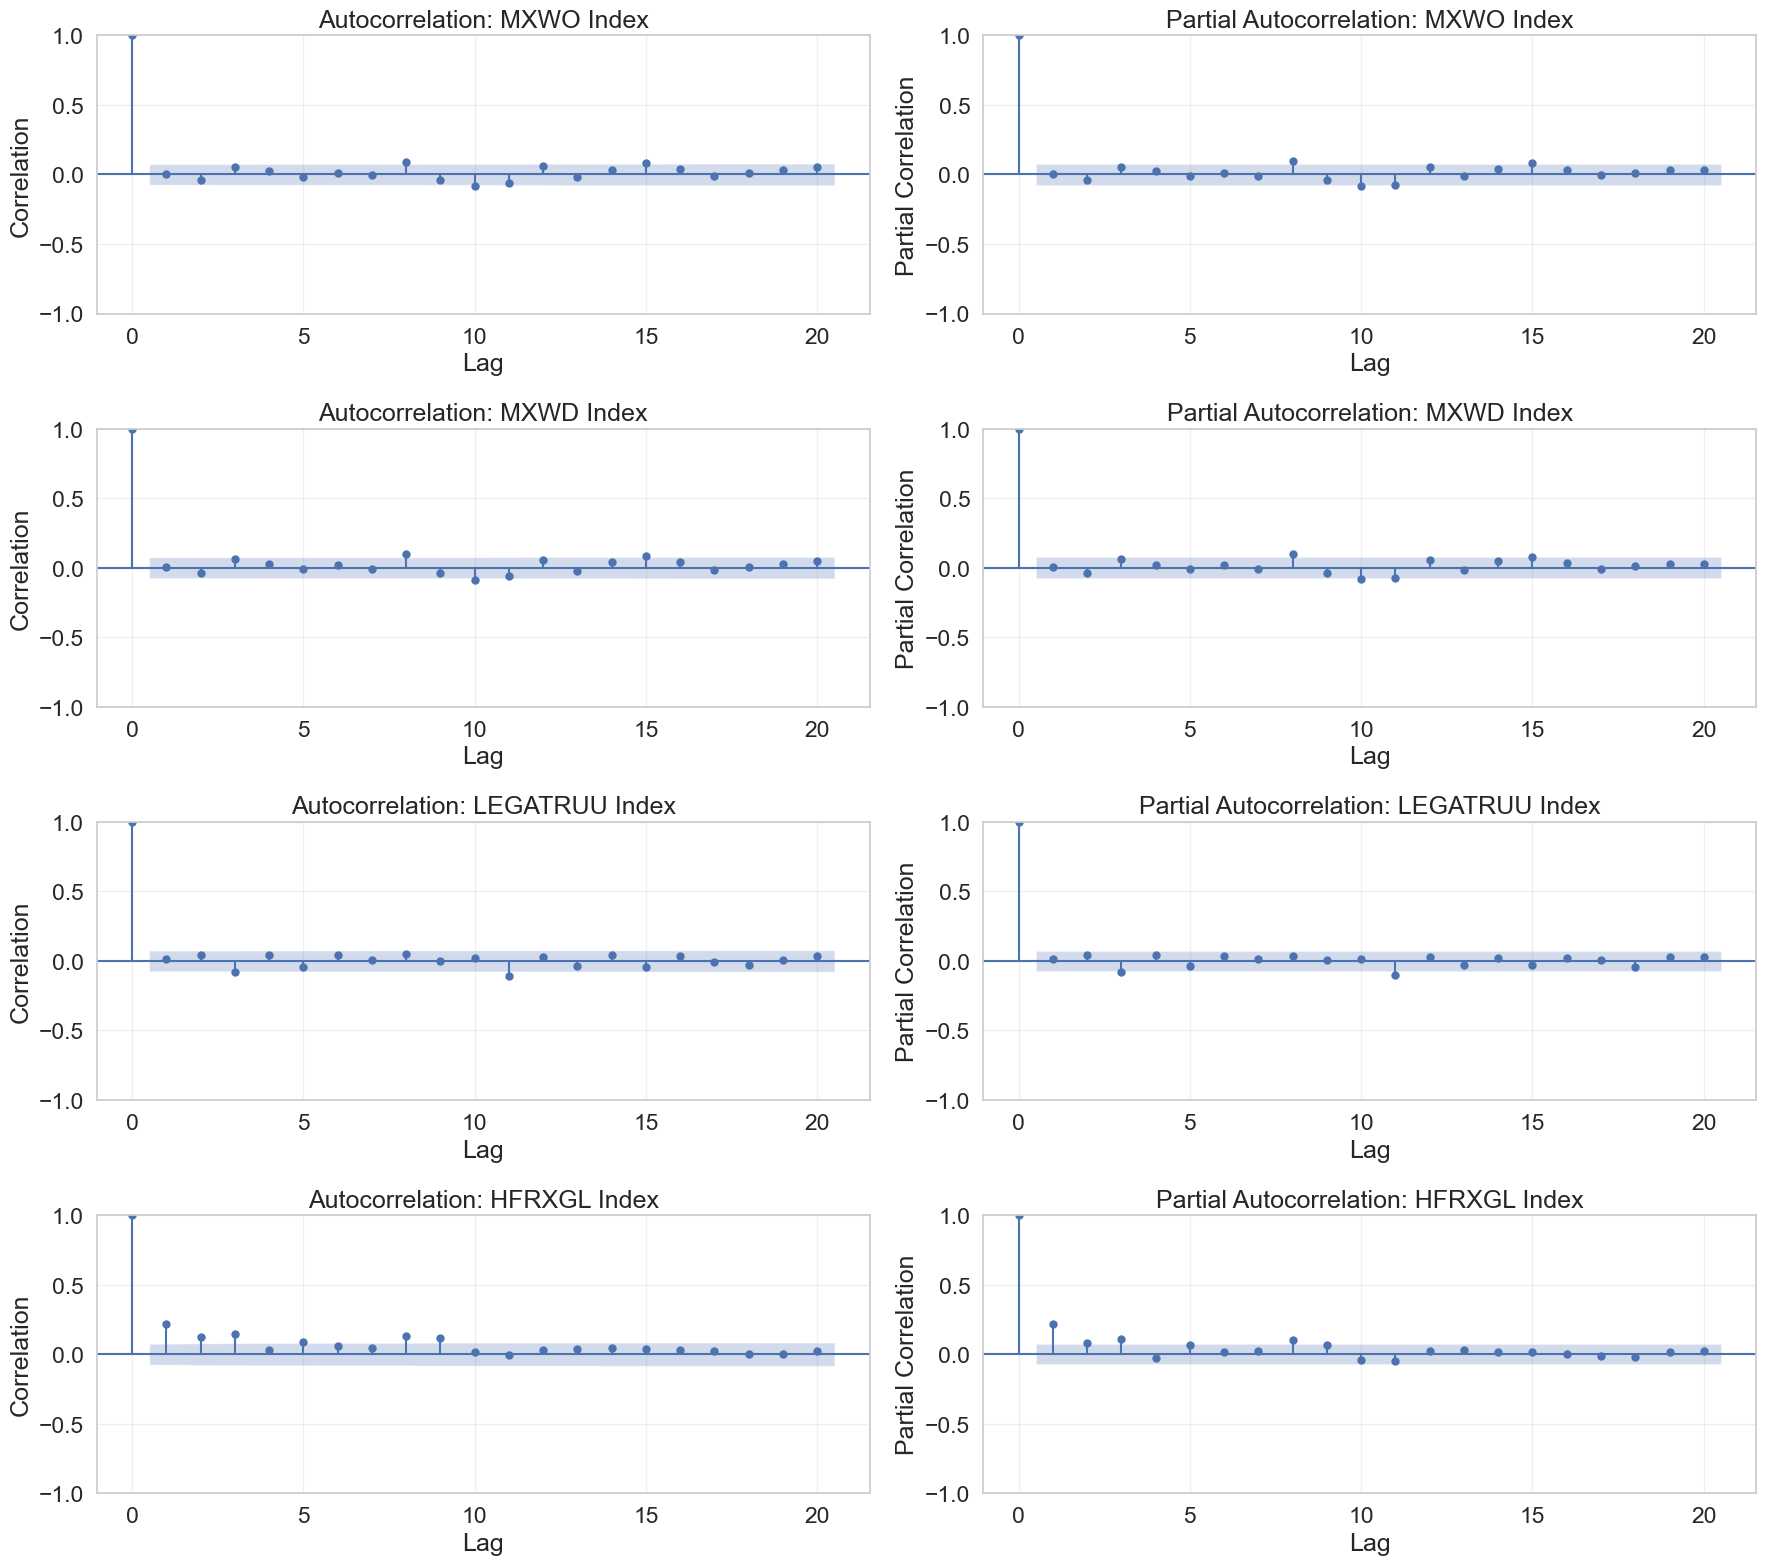

In [12]:
# Autocorrelation and Partial Autocorrelation analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define the maximum number of lags to analyze
max_lags = 20

# Create a figure for ACF and PACF plots
fig, axes = plt.subplots(len(target_indices), 2, figsize=(18, 4*len(target_indices)))

# For each target index
for i, idx in enumerate(target_indices):
    # Get returns data for this index
    returns_data = returns[idx].dropna()

    # Plot ACF (Autocorrelation Function)
    plot_acf(returns_data,
             lags=max_lags,
             ax=axes[i, 0],
             title=f'Autocorrelation: {idx}',
             alpha=0.05)  # 95% confidence intervals

    axes[i, 0].set_xlabel('Lag')
    axes[i, 0].set_ylabel('Correlation')
    axes[i, 0].grid(True, alpha=0.3)

    # Plot PACF (Partial Autocorrelation Function)
    plot_pacf(returns_data,
              lags=max_lags,
              ax=axes[i, 1],
              title=f'Partial Autocorrelation: {idx}',
              alpha=0.05)  # 95% confidence intervals

    axes[i, 1].set_xlabel('Lag')
    axes[i, 1].set_ylabel('Partial Correlation')
    axes[i, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson
from IPython.display import display

# Lists to collect results
dw_results = []
lb_results = []

print("\nDurbin Watson test for Autocorrelation (H0: No autocorrelation)")
for idx in target_indices:
    returns_data = returns[idx].dropna()
    # Compute Durbin-Watson test statistic
    dw_stat = durbin_watson(returns_data)
    # Print the result
    print(f"\n{idx}:")
    print(f"  Durbin-Watson: {dw_stat:.4f}")
    # Collect the result
    dw_results.append({
        "Index": idx,
        "Test": "Durbin-Watson",
        "Metric": "Statistic",
        "Value": dw_stat
    })

print("\nLjung-Box test for Autocorrelation (H0: No autocorrelation)")
# We will check lags 5, 10, 15, and 20
lags_to_check = [5, 10, 15, 20]
for idx in target_indices:
    returns_data = returns[idx].dropna()
    # Compute the Ljung-Box test for multiple lags
    lb_test = acorr_ljungbox(returns_data, lags=lags_to_check)
    for j, lag in enumerate(lags_to_check):
        test_stat = lb_test.iloc[j, 0]
        p_value = lb_test.iloc[j, 1]
        print(f"\n{idx} - Lag {lag}:")
        print(f"  Test Statistic = {test_stat:.4f}, p-value = {p_value:.4f}")
        lb_results.append({
            "Index": idx,
            "Test": f"Ljung-Box (Lag {lag})",
            "Metric": "Test Statistic",
            "Value": test_stat,
            "p-value": p_value
        })

# Combine the Durbin-Watson and Ljung-Box results
dw_df = pd.DataFrame(dw_results)
lb_df = pd.DataFrame(lb_results)
results_df = pd.concat([dw_df, lb_df], ignore_index=True)

print("\nSummary of Autocorrelation Analysis Results:")
display(results_df)



Durbin Watson test for Autocorrelation (H0: No autocorrelation)

MXWO Index:
  Durbin-Watson: 1.9928

MXWD Index:
  Durbin-Watson: 1.9905

LEGATRUU Index:
  Durbin-Watson: 1.9577

HFRXGL Index:
  Durbin-Watson: 1.5666

Ljung-Box test for Autocorrelation (H0: No autocorrelation)

MXWO Index - Lag 5:
  Test Statistic = 3.7194, p-value = 0.5905

MXWO Index - Lag 10:
  Test Statistic = 16.3144, p-value = 0.0910

MXWO Index - Lag 15:
  Test Statistic = 27.3792, p-value = 0.0258

MXWO Index - Lag 20:
  Test Statistic = 31.2372, p-value = 0.0521

MXWD Index - Lag 5:
  Test Statistic = 4.0704, p-value = 0.5393

MXWD Index - Lag 10:
  Test Statistic = 17.4323, p-value = 0.0653

MXWD Index - Lag 15:
  Test Statistic = 28.4624, p-value = 0.0188

MXWD Index - Lag 20:
  Test Statistic = 32.0118, p-value = 0.0432

LEGATRUU Index - Lag 5:
  Test Statistic = 8.3823, p-value = 0.1364

LEGATRUU Index - Lag 10:
  Test Statistic = 11.6799, p-value = 0.3071

LEGATRUU Index - Lag 15:
  Test Statistic = 23.

Index                Test          Metric      Value  \
0       MXWO Index       Durbin-Watson       Statistic   1.992776   
1       MXWD Index       Durbin-Watson       Statistic   1.990460   
2   LEGATRUU Index       Durbin-Watson       Statistic   1.957666   
3     HFRXGL Index       Durbin-Watson       Statistic   1.566647   
4       MXWO Index   Ljung-Box (Lag 5)  Test Statistic   3.719379   
5       MXWO Index  Ljung-Box (Lag 10)  Test Statistic  16.314382   
6       MXWO Index  Ljung-Box (Lag 15)  Test Statistic  27.379250   
7       MXWO Index  Ljung-Box (Lag 20)  Test Statistic  31.237154   
8       MXWD Index   Ljung-Box (Lag 5)  Test Statistic   4.070395   
9       MXWD Index  Ljung-Box (Lag 10)  Test Statistic  17.432324   
10      MXWD Index  Ljung-Box (Lag 15)  Test Statistic  28.462362   
11      MXWD Index  Ljung-Box (Lag 20)  Test Statistic  32.011846   
12  LEGATRUU Index   Ljung-Box (Lag 5)  Test Statistic   8.382315   
13  LEGATRUU Index  Ljung-Box (Lag 10)  Test Statistic  11.679886   
14  LEGATRUU Index  Ljung-Box (Lag 15)  Test Statistic  23.826463   
15  LEGATRUU Index  Ljung-Box (Lag 20)  Test Statistic  26.548569   
16    HFRXGL Index   Ljung-Box (Lag 5)  Test Statistic  63.953960   
17    HFRXGL Index  Ljung-Box (Lag 10)  Test Statistic  90.737110   
18    HFRXGL Index  Ljung-Box (Lag 15)  Test Statistic  94.791307   
19    HFRXGL Index  Ljung-Box (Lag 20)  Test Statistic  96.313795   

         p-value  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4   5.904827e-01  
5   9.097959e-02  
6   2.579402e-02  
7   5.213647e-02  
8   5.393259e-01  
9   6.532857e-02  
10  1.884765e-02  
11  4.317225e-02  
12  1.363862e-01  
13  3.070517e-01  
14  6.809966e-02  
15  1.484490e-01  
16  1.846726e-12  
17  3.824863e-15  
18  1.255917e-13  
19  5.719282e-12

# Volatility clustering analysis

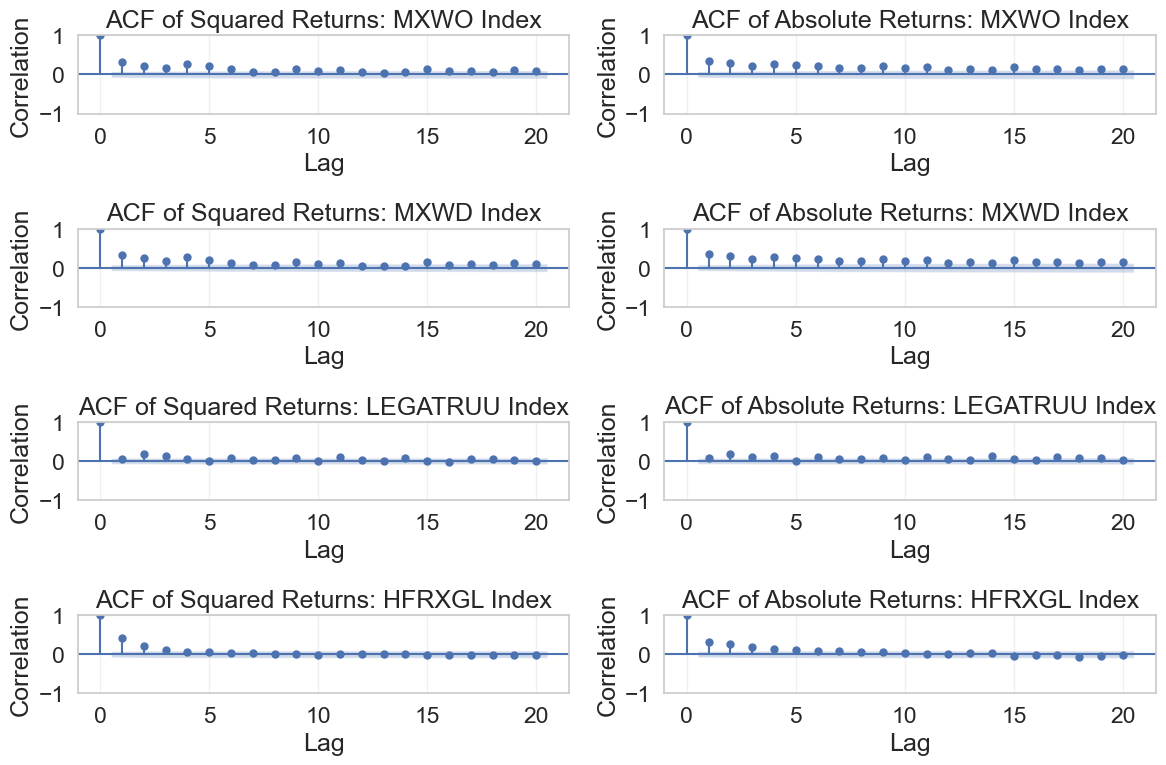

In [14]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Define a figure size that spans two columns for all target indices
side_by_side_figsize = (12, 2 * len(target_indices))

# Create a figure with rows equal to the number of target indices and 2 columns
fig, axes = plt.subplots(len(target_indices), 2, figsize=side_by_side_figsize)

# If there's only one target index, reshape axes to be 2D for consistency
if len(target_indices) == 1:
    axes = axes.reshape(1, -1)

# Plot side by side for each target index
for i, idx in enumerate(target_indices):
    # Compute squared returns (proxy for volatility)
    squared_returns = returns[idx].dropna() ** 2
    # Plot ACF for squared returns in the left column
    plot_acf(squared_returns,
             lags=max_lags,
             ax=axes[i, 0],
             title=f'ACF of Squared Returns: {idx}',
             alpha=0.05)  # 95% confidence intervals
    axes[i, 0].set_xlabel('Lag')
    axes[i, 0].set_ylabel('Correlation')
    axes[i, 0].grid(True, alpha=0.3)
    
    # Compute absolute returns (another proxy for volatility)
    abs_returns = abs(returns[idx].dropna())
    # Plot ACF for absolute returns in the right column
    plot_acf(abs_returns,
             lags=max_lags,
             ax=axes[i, 1],
             title=f'ACF of Absolute Returns: {idx}',
             alpha=0.05)
    axes[i, 1].set_xlabel('Lag')
    axes[i, 1].set_ylabel('Correlation')
    axes[i, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


<br>

Now let's analyze our constructed target index(Monster Index) and Futures contracts that are candidates to replicate it in more detail to understand its characteristics before attempting replication.

<br>

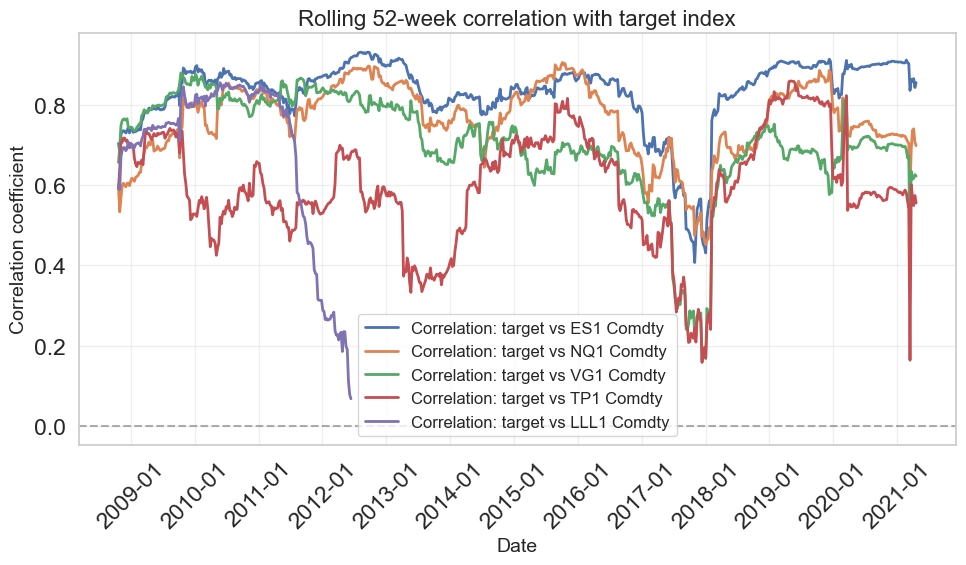

In [15]:
# Plot rolling correlations between target index and Futures contracts
rolling_window = 52  # 52 weeks ≈ 1 year
plt.figure(figsize=(10, 6))

# Select top 5 futures by correlation (absolute value)
top_futures = correlations.index[:5].tolist()

for contract in top_futures:
    # Calculate rolling correlation
    combined_df = pd.DataFrame({
        'Target': target_returns_aligned,  # Fixed variable name
        'Future': futures_returns[contract]
    })
    rolling_corr = combined_df['Target'].rolling(rolling_window).corr(combined_df['Future'])

    # Plot
    plt.plot(rolling_corr.index, rolling_corr, linewidth=2,
             label=f"Correlation: target vs {contract}")

plt.title(f'Rolling {rolling_window}-week correlation with target index', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Correlation coefficient', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=12)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
# Calculate and display target index statistics
print("\nTarget index statistics:")
annual_factor = 52  # For weekly data

# Calculate statistics
mean_return = target_returns_aligned.mean() * annual_factor
volatility = target_returns_aligned.std() * np.sqrt(annual_factor)
sharpe_ratio = mean_return / volatility
cumulative_returns = (1 + target_returns_aligned).cumprod()
drawdowns = 1 - cumulative_returns / cumulative_returns.cummax()
max_drawdown = drawdowns.max()
skewness = target_returns_aligned.skew()
kurtosis = target_returns_aligned.kurtosis()

# Display statistics
stats_df = pd.DataFrame({
    'Statistic': ['Annualized return', 'Annualized volatility', 'Sharpe ratio',
                  'Max Drawdown', 'Skewness', 'Kurtosis'],
    'Value': [f"{mean_return*100:.2f}%",
              f"{volatility*100:.2f}%",
              f"{sharpe_ratio:.2f}",
              f"{max_drawdown*100:.2f}%",
              f"{skewness:.2f}",
              f"{kurtosis:.2f}"]
})

display(stats_df)


Target index statistics:


Statistic   Value
0      Annualized return   2.57%
1  Annualized volatility   6.33%
2           Sharpe ratio    0.41
3           Max Drawdown  29.01%
4               Skewness   -1.35
5               Kurtosis    7.64

In [17]:

# Also calculate and display monthly returns statistics
if len(target_returns_aligned) >= 12:  # Ensure we have enough data
    # Resample to monthly returns using 'ME' (month end) frequency - more robust
    monthly_returns = target_returns_aligned.resample('ME').apply(
        lambda x: (1 + x).prod() - 1)

    # Calculate monthly statistics
    monthly_mean = monthly_returns.mean() * 12
    monthly_vol = monthly_returns.std() * np.sqrt(12)
    monthly_sharpe = monthly_mean / monthly_vol if monthly_vol > 0 else 0

    # Display monthly statistics
    print("\nMonthly return statistics:")
    monthly_stats = pd.DataFrame({
        'Statistic': ['Annualized return (monthly)',
                     'Annualized volatility (monthly)',
                     'Sharpe ratio (monthly)'],
        'Value': [f"{monthly_mean*100:.2f}%",
                 f"{monthly_vol*100:.2f}%",
                 f"{monthly_sharpe:.2f}"]
    })

    display(monthly_stats)



Monthly return statistics:


Statistic  Value
0      Annualized return (monthly)  2.65%
1  Annualized volatility (monthly)  7.55%
2           Sharpe ratio (monthly)   0.35

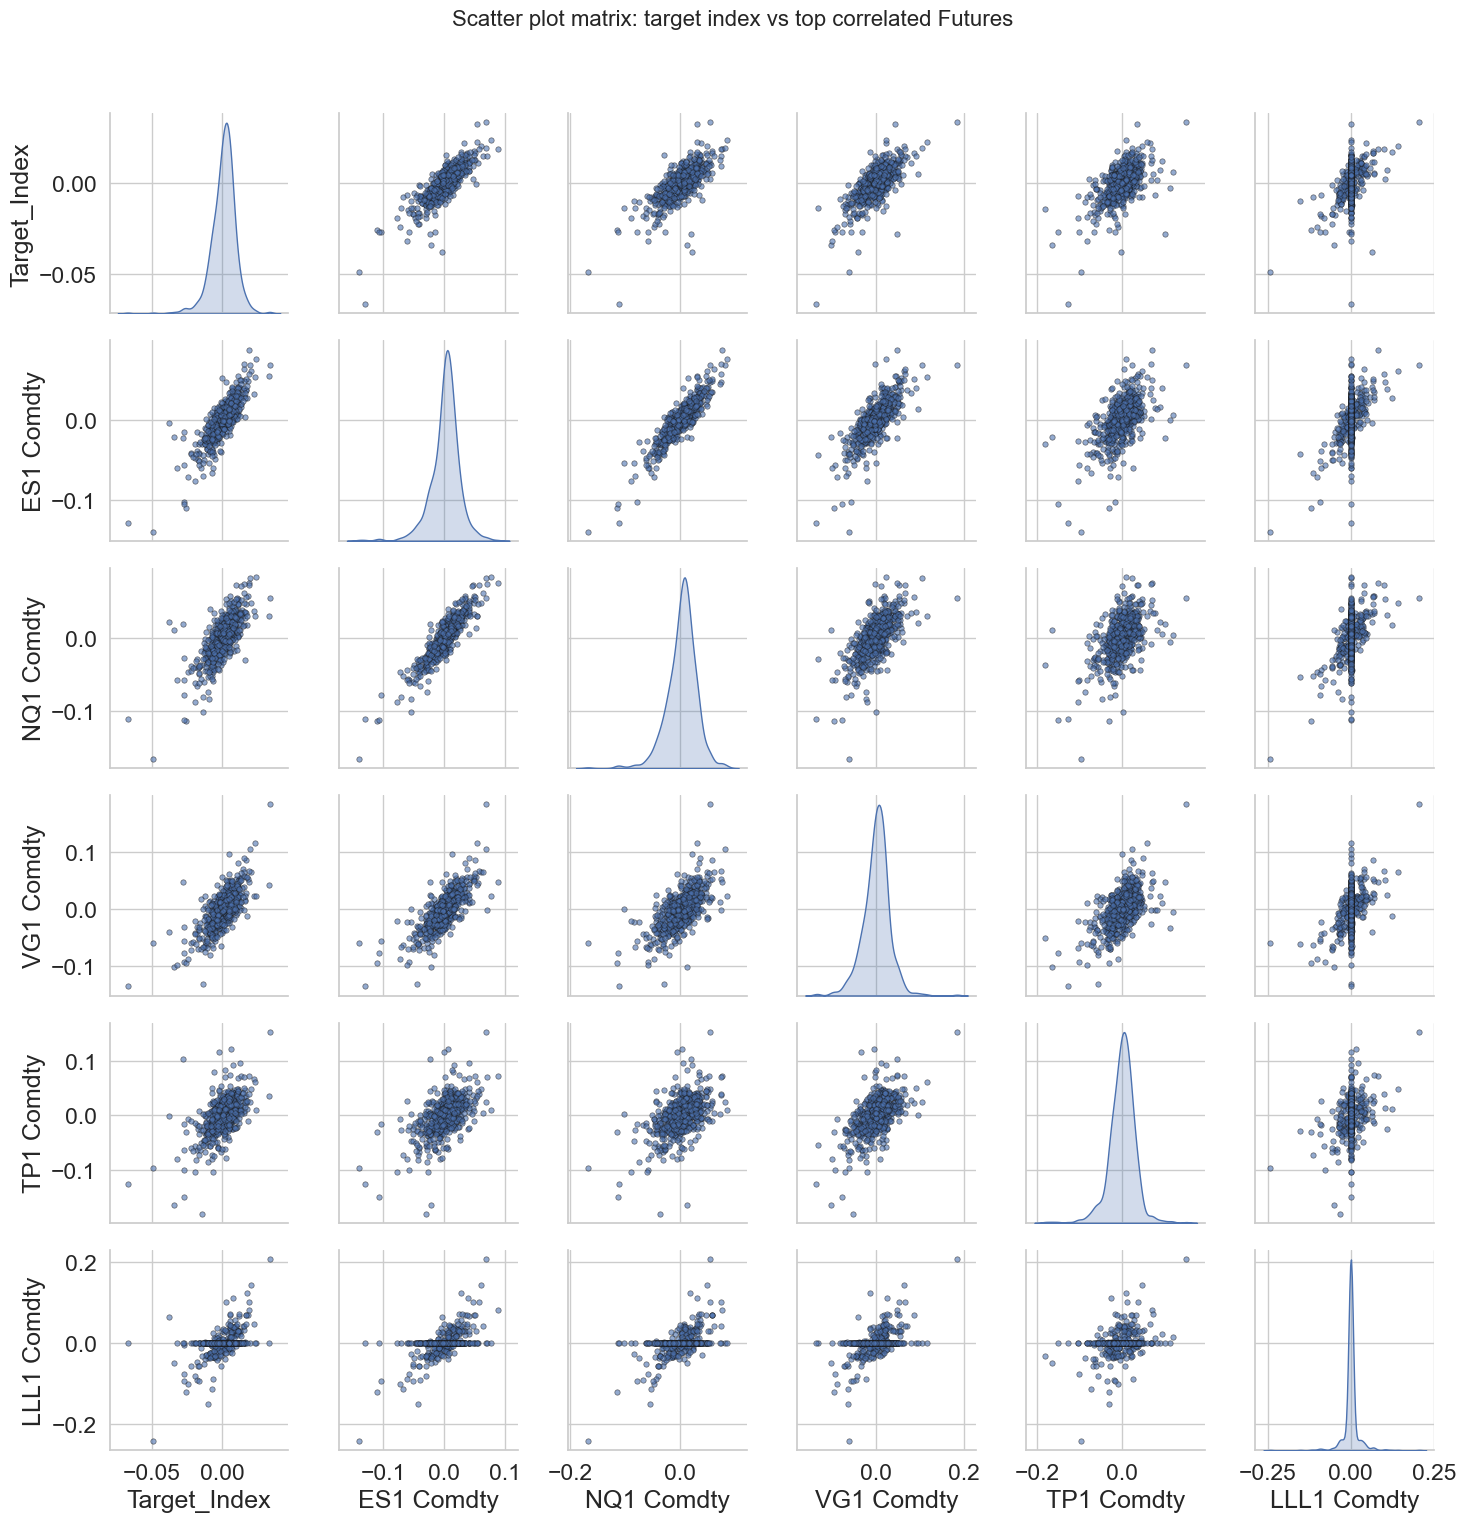

In [18]:
# Create a scatter plot matrix for the target index and top correlated futures
top_futures_plus_target = ['Target_Index'] + top_futures
scatter_data = pd.concat([target_returns_aligned.rename('Target_Index'),
                          futures_returns[top_futures]], axis=1)

# Create a pair plot
sns.pairplot(scatter_data, kind='scatter', diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 15, 'edgecolor': 'k', 'linewidth': 0.5})
plt.suptitle('Scatter plot matrix: target index vs top correlated Futures',
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [49]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler
from itertools import product
from sklearn.linear_model import LinearRegression


# Ensure data is properly aligned
y = target_returns_aligned  # Target index returns
X = futures_returns.loc[y.index]  # Futures returns aligned with target

# VaR parameters
var_confidence = 0.01  # 1% VaR
var_horizon = 4  # 4 weeks (1 month)
max_var_threshold = 0.08  # 20% maximum VaR(1%, 1 month)

# Convert to numpy arrays for easier indexing
X_values = X.values
y_values = y.values
dates_array = X.index.to_numpy()

# Suppress boring warnings during the loop
import warnings
warnings.filterwarnings('ignore')

In [65]:
def plot_metrics(best_config_normalized): 
   # Plot cumulative returns
    plt.figure(figsize=(12, 6))
    plt.plot(best_config_normalized['cumulative_target'], label='Target index', color='blue')
    plt.plot(best_config_normalized['cumulative_replica'], label='Replica portfolio', color='red')
    plt.title('Cumulative returns: target vs replica')
    plt.xlabel('Date')
    plt.ylabel('Cumulative return')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot drawdowns
    plt.figure(figsize=(12, 6))
    target_drawdown = 1 - best_config_normalized['cumulative_target'] / best_config_normalized['cumulative_target'].cummax()
    replica_drawdown = 1 - best_config_normalized['cumulative_replica'] / best_config_normalized['cumulative_replica'].cummax()
    plt.plot(target_drawdown, label='Target index', color='blue')
    plt.plot(replica_drawdown, label='Replica portfolio', color='red')
    plt.title('Drawdowns: target vs replica')
    plt.xlabel('Date')
    plt.ylabel('Drawdown')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot gross exposure over time
    plt.figure(figsize=(12, 6))
    gross_exposure_series = pd.Series(best_config_normalized['gross_exposures'], index=best_config_normalized['replica_returns'].index)
    plt.plot(gross_exposure_series, color='purple')
    plt.title('Gross exposure over time')
    plt.xlabel('Date')
    plt.ylabel('Gross exposure')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot VaR over time
    plt.figure(figsize=(12, 6))
    var_series = pd.Series(best_config_normalized['var_values'], index=best_config_normalized['replica_returns'].index)
    plt.plot(var_series, color='orange')
    plt.axhline(y=max_var_threshold, color='r', linestyle='--', label=f'VaR threshold ({max_var_threshold*100}%)')
    plt.title('Value at Risk (VaR) over time')
    plt.xlabel('Date')
    plt.ylabel('VaR (1%, 1M)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot scaling factors over time
    plt.figure(figsize=(12, 6))
    scaling_series = pd.Series(best_config_normalized['scaling_factors'], index=best_config_normalized['replica_returns'].index)
    plt.plot(scaling_series, color='green')
    plt.title('Risk scaling factors over time')
    plt.xlabel('Date')
    plt.ylabel('Scaling factor')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

In [50]:
# Function to calculate VaR
def calculate_var(returns, confidence=0.01, horizon=4):
    """
    Calculate Value at Risk (VaR) using a simple Gaussian model (you can do better)

    Parameters:
    returns (array-like): Historical returns
    confidence (float): Confidence level (e.g., 0.01 for 1% VaR)
    horizon (int): Time horizon in weeks

    Returns:
    float: VaR as a positive number (loss)
    """
    # Calculate standard deviation of returns
    sigma = np.std(returns)

    # Calculate VaR using a Gaussian model
    # For a loss, we use the negative of the quantile
    # We use the negative of the quantile because VaR represents a loss
    # Note: this is just a a widespread and questionable practice (which I do not loke because it is ambiguous, there could be a positive VaR)
    z_score = stats.norm.ppf(confidence)

    # Scale to the desired time horizon
    var = -z_score * sigma * np.sqrt(horizon)

    return var

# LINEAR REGRESSION

In [66]:
# Function to run a single configuration with normalized returns, VaR scaling, and transaction cost adjustment
def run_linear_regression_normalized( rolling_window, transaction_cost_rate,rebalancing_window):
    # Initialize arrays to store results
    weights_history = []       # Store weights over time
    replica_returns = []       # Store replica portfolio returns
    target_dates = []          # Store dates for plotting
    gross_exposures = []       # Store gross exposure over time
    var_values = []            # Store VaR values over time
    scaling_factors = []       # Store scaling factors applied
    transaction_costs = []     # Store the transaction costs incurred each period

    # Loop through the data using a rolling window approach as explained before
    for i in range(len(X) - rolling_window - 1):
        if i%rebalancing_window == 0:
            # Define training window
            start_idx = i
            end_idx = i + rolling_window

            # Extract training data
            X_train = X_values[start_idx:end_idx]
            y_train = y_values[start_idx:end_idx]

            # Normalize the training data using MinMaxScaler
            scaler_X = MinMaxScaler()
            X_train_normalized = scaler_X.fit_transform(X_train)

            # Normalize target
            scaler_y = MinMaxScaler()
            y_train_normalized = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

            # Linear regression model
            model = LinearRegression(
                fit_intercept=False,  # No intercept for the weights
            )

            model.fit(X_train_normalized, y_train_normalized)

            # Get the normalized weights
            normalized_weights = model.coef_

            # Calculate weights in the original scale
            original_weights = normalized_weights / scaler_X.scale_

            # Default scaling factor for VaR adjustment
            scaling_factor = 1.0

            # If we have enough historical data, calculate VaR and scale if needed
            if len(replica_returns) >= 12:  # Need some history to calculate VaR...
                # Calculate historical replica returns using current weights
                historical_returns = []
                for j in range(max(0, len(replica_returns)-52), len(replica_returns)):
                    # Get historical futures returns for this period
                    hist_returns = X_values[end_idx - (len(replica_returns) - j)]
                    # Calculate weighted return
                    weighted_return = np.dot(hist_returns, original_weights)
                    historical_returns.append(weighted_return)

                # Calculate VaR
                var = calculate_var(
                    historical_returns,
                    confidence=var_confidence,
                    horizon=var_horizon
                )

                # Scale weights if VaR exceeds threshold
                if var > max_var_threshold:
                    scaling_factor = max_var_threshold / var
                    original_weights = original_weights * scaling_factor

                    # Recalculate VaR after scaling to verify
                    scaled_historical_returns = [ret * scaling_factor for ret in historical_returns]
                    scaled_var = calculate_var(
                        scaled_historical_returns,
                        confidence=var_confidence,
                        horizon=var_horizon
                    )

                    var = scaled_var  # Update VaR value after scaling

                var_values.append(var)
            else:
                var_values.append(np.nan)

            # Store scaling factor
            scaling_factors.append(scaling_factor)

            # Calculate gross exposure (sum of absolute weights) after scaling
            gross_exposure = np.sum(np.abs(original_weights))
            gross_exposures.append(gross_exposure)

            # Compute transaction cost if this is not the first period
            if weights_history:
                previous_weights = weights_history[-1]
                turnover = np.sum(np.abs(original_weights - previous_weights))
                cost = transaction_cost_rate * turnover
            else:
                cost = 0.0

            transaction_costs.append(cost)

            # Store the weights after scaling
            weights_history.append(original_weights)

            # Calculate replica return for the next period (t+1)
            next_returns = X_values[end_idx]  # This is t+1

            # Use scaled original weights with original returns
            raw_replica_return = np.dot(next_returns, original_weights)

            # Adjust the return by subtracting the transaction cost
            replica_return = raw_replica_return - cost

            replica_returns.append(replica_return)

            # Store the date for t+1
            target_dates.append(dates_array[end_idx])

    # Convert results to pandas series for easier analysis
    replica_returns_series = pd.Series(replica_returns, index=target_dates)

    # Calculate cumulative returns for both target and replica
    aligned_target = y.loc[replica_returns_series.index]
    cumulative_target = (1 + aligned_target).cumprod()
    cumulative_replica = (1 + replica_returns_series).cumprod()

    # Calculate performance metrics
    replica_mean_return = replica_returns_series.mean() * 52  # annualized
    target_mean_return = aligned_target.mean() * 52  # annualized

    replica_vol = replica_returns_series.std() * np.sqrt(52)  # annualized
    target_vol = aligned_target.std() * np.sqrt(52)  # annualized

    replica_sharpe = replica_mean_return / replica_vol if replica_vol > 0 else 0
    target_sharpe = target_mean_return / target_vol if target_vol > 0 else 0

    # Calculate tracking error
    tracking_error = (replica_returns_series - aligned_target).std() * np.sqrt(52)
    information_ratio = (replica_mean_return - target_mean_return) / tracking_error if tracking_error > 0 else 0

    # Calculate drawdowns
    replica_drawdown = 1 - cumulative_replica / cumulative_replica.cummax()
    target_drawdown = 1 - cumulative_target / cumulative_target.cummax()

    # Calculate correlation
    correlation = replica_returns_series.corr(aligned_target)

    # Calculate average gross exposure
    avg_gross_exposure = np.mean(gross_exposures)

    # Calculate average VaR (excluding NaN values)
    avg_var = np.nanmean(var_values)

    # Return all metrics along with transaction costs if desired
    return {
        'rolling_window': rolling_window,
        'replica_return': replica_mean_return,
        'target_return': target_mean_return,
        'replica_vol': replica_vol,
        'target_vol': target_vol,
        'replica_sharpe': replica_sharpe,
        'target_sharpe': target_sharpe,
        'tracking_error': tracking_error,
        'information_ratio': information_ratio,
        'correlation': correlation,
        'max_drawdown': replica_drawdown.max(),
        'avg_gross_exposure': avg_gross_exposure,
        'avg_var': avg_var,
        'replica_returns': replica_returns_series,
        'aligned_target': aligned_target,
        'cumulative_replica': cumulative_replica,
        'cumulative_target': cumulative_target,
        'gross_exposures': gross_exposures,
        'var_values': var_values,
        'scaling_factors': scaling_factors,
        'weights_history': weights_history,
        'transaction_costs': transaction_costs  # Additional information on costs
    }


In [67]:
# Run all combinations with normalized returns
results_normalized = []
transaction_cost_rate = 0


rolling_windows = [52]  # Use the best rolling window from Optuna
rebalancing_windows = [1]  # Use the best rebalancing window from Optuna

for rolling_window , rebalancing_window in product(rolling_windows, rebalancing_windows):
    print(f"Running linear regression with rolling window {rolling_window} and transaction cost rate {transaction_cost_rate}...")
    # Run the linear regression with normalized returns
    print(rolling_window, rebalancing_window)
    result = run_linear_regression_normalized( rolling_window,  transaction_cost_rate, rebalancing_window)
    results_normalized.append(result)

# Convert results to DataFrame for easier analysis
results_df_normalized = pd.DataFrame(results_normalized)

# Sort by information ratio (higher is better) - our primary objective
sorted_results_normalized = results_df_normalized.sort_values(by='information_ratio', ascending=False)

# Display top 10 configurations by information ratio
print("\nTop 10 configurations by information ratio (normalized returns):")
display(sorted_results_normalized[['rolling_window', 'information_ratio', 'correlation',
                       'tracking_error', 'replica_sharpe', 'avg_gross_exposure', 'avg_var']].head(10))



Running linear regression with rolling window 52 and transaction cost rate 0...
52 1

Top 10 configurations by information ratio (normalized returns):


rolling_window  information_ratio  correlation  tracking_error  \
0              52          -0.601426     0.733995        0.042588   

   replica_sharpe  avg_gross_exposure   avg_var  
0        0.598276            0.202539  0.019487

In [68]:
# Create detailed metrics table for the best configuration
metrics_normalized = pd.DataFrame({
    'Metric': ['Annualized return', 'Annualized volatility', 'Sharpe ratio',
               'Max Drawdown', 'Tracking Error', 'Information ratio',
               'Correlation', 'Average gross exposure', 'Average VaR (1%, 1M)'],
    'Target': [f"{best_config_normalized['target_return']*100:.2f}%",
               f"{best_config_normalized['target_vol']*100:.2f}%",
               f"{best_config_normalized['target_sharpe']:.2f}",
               f"{best_config_normalized['max_drawdown']*100:.2f}%",
               "N/A",
               "N/A",
               "N/A",
               "N/A",
               "N/A"],
    'Replica': [f"{best_config_normalized['replica_return']*100:.2f}%",
                f"{best_config_normalized['replica_vol']*100:.2f}%",
                f"{best_config_normalized['replica_sharpe']:.2f}",
                f"{best_config_normalized['max_drawdown']*100:.2f}%",
                f"{best_config_normalized['tracking_error']*100:.2f}%",
                f"{best_config_normalized['information_ratio']:.2f}",
                f"{best_config_normalized['correlation']:.4f}",
                f"{best_config_normalized['avg_gross_exposure']:.4f}",
                f"{best_config_normalized['avg_var']*100:.2f}%"]
})

print("\nDetailed metrics for the best configuration (normalized returns):")
display(metrics_normalized)


Detailed metrics for the best configuration (normalized returns):


Metric Target Replica
0       Annualized return  4.55%   1.99%
1   Annualized volatility  6.05%   3.32%
2            Sharpe ratio   0.75    0.60
3            Max Drawdown  9.67%   9.67%
4          Tracking Error    N/A   4.26%
5       Information ratio    N/A   -0.60
6             Correlation    N/A  0.7340
7  Average gross exposure    N/A  0.2025
8    Average VaR (1%, 1M)    N/A   1.95%

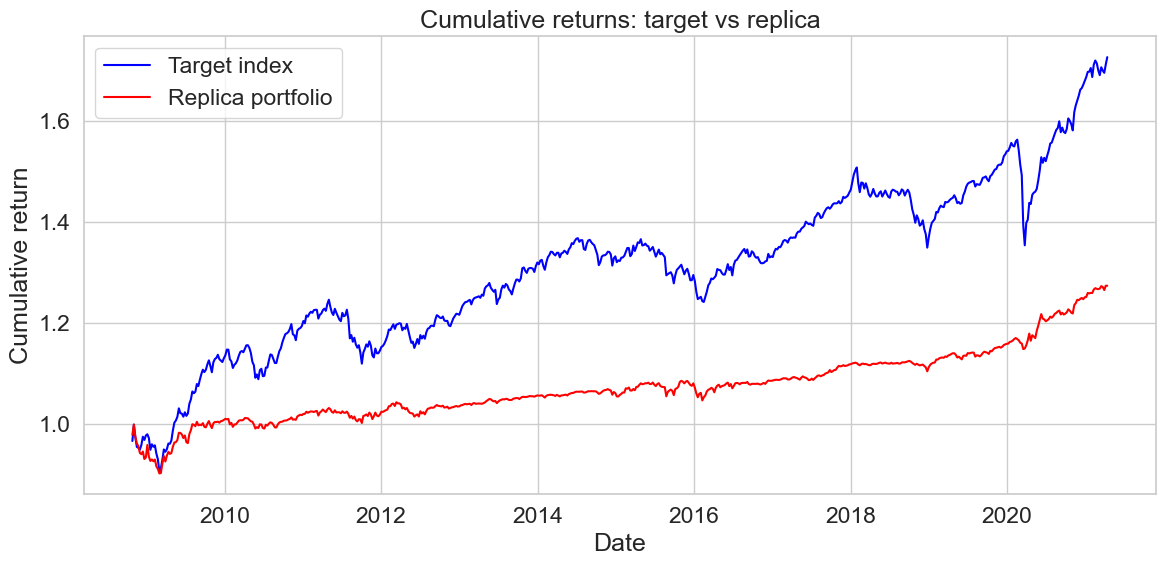

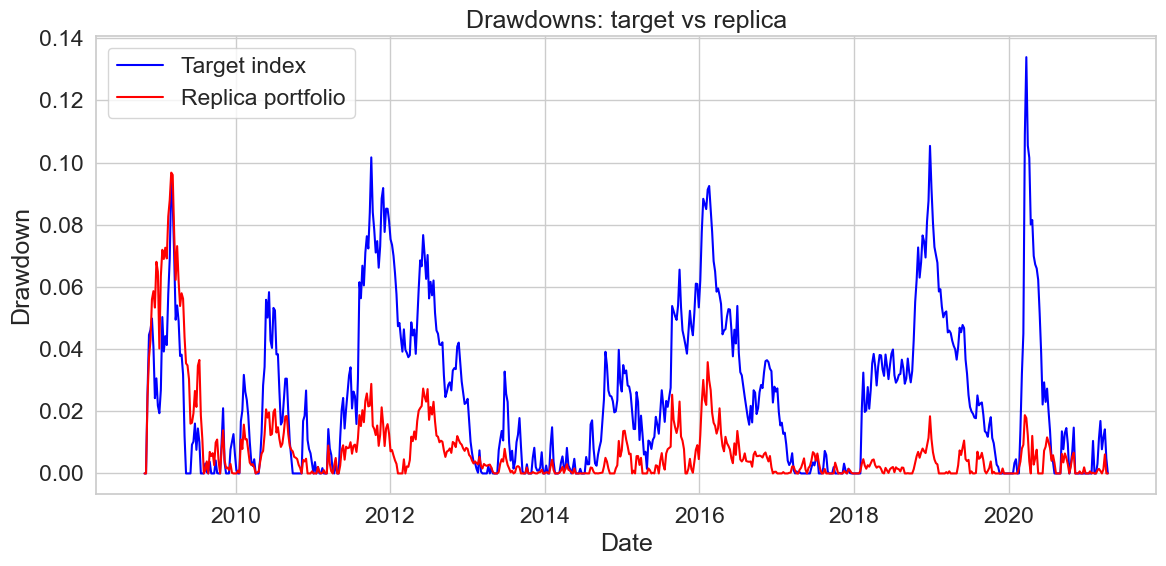

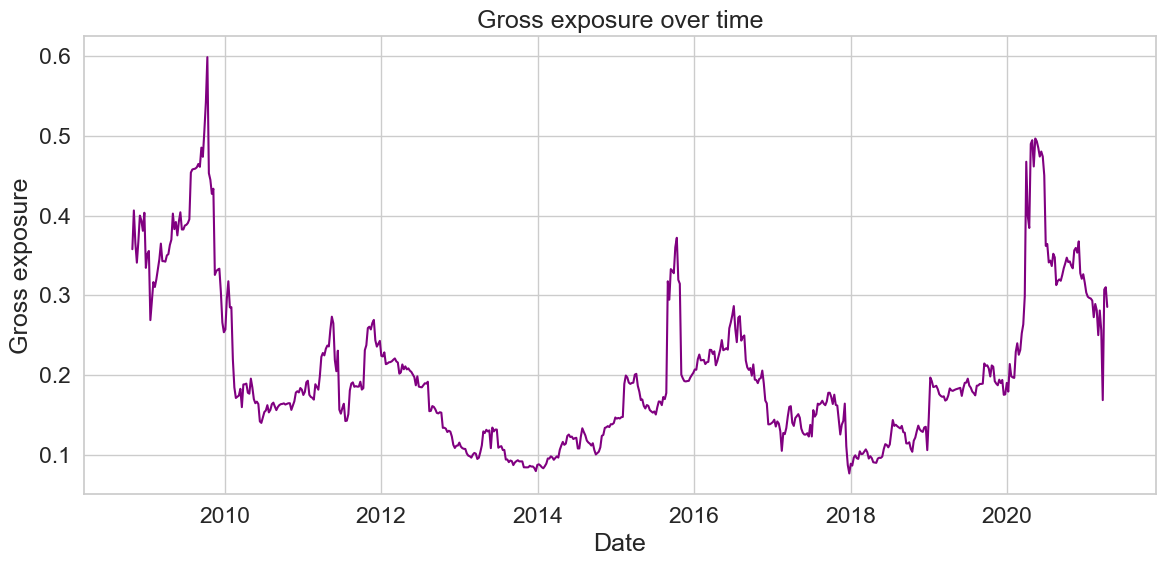

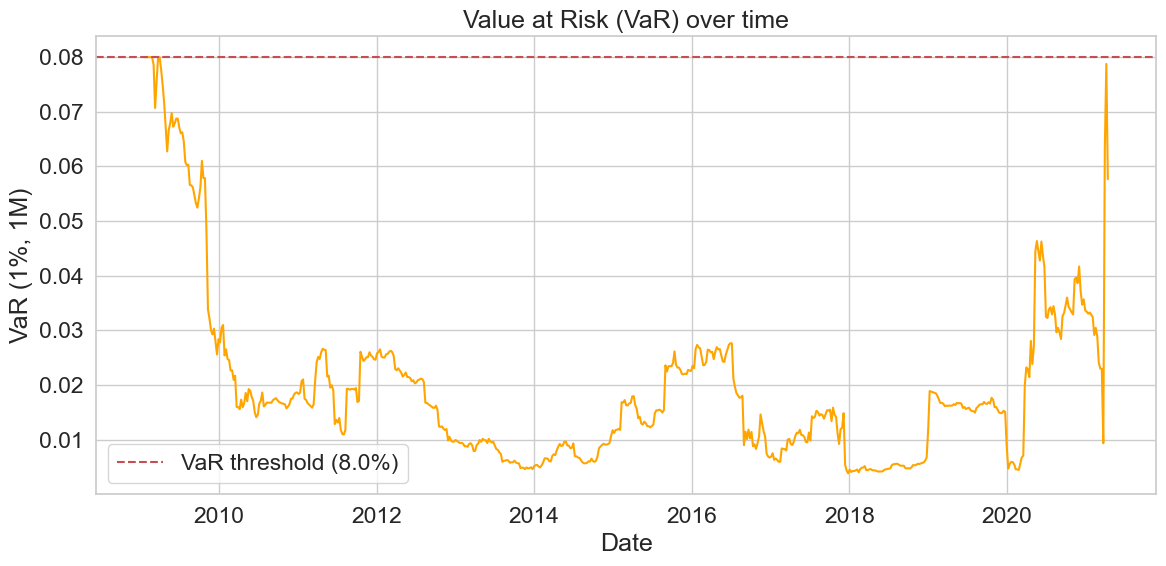

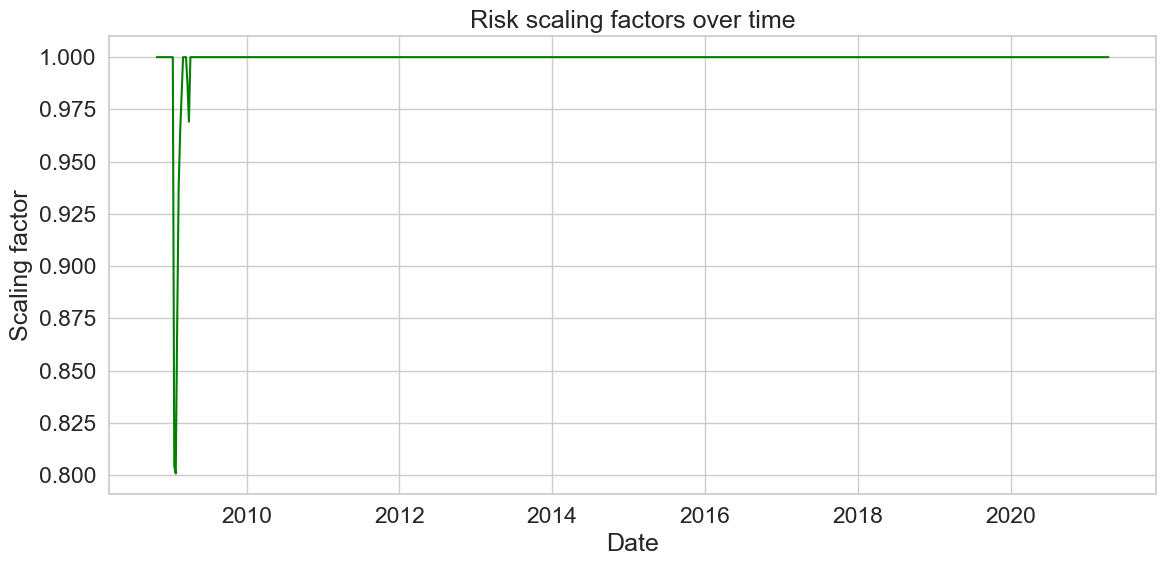

In [69]:
plot_metrics(best_config_normalized)

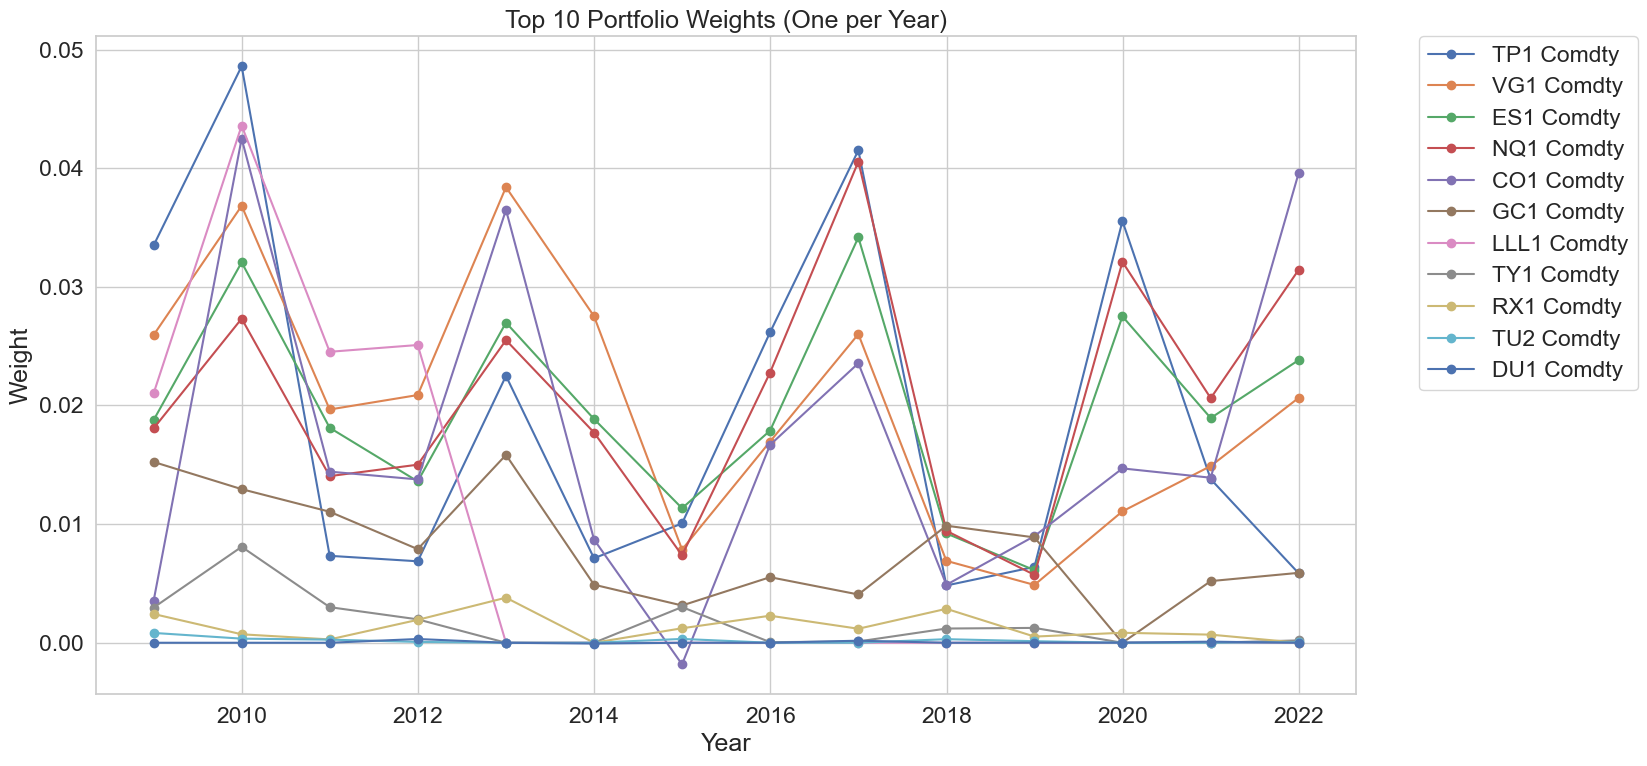

In [72]:
# Downsample the weights DataFrame to one observation per year.
# This example uses the first available weight in each year.
weights_df_yearly = weights_df.resample('A').first()

# Determine the top 10 weights by their average absolute value from the original series
top_weights = weights_df.abs().mean().sort_values(ascending=False).head(11).index

plt.figure(figsize=(14, 8))
for col in top_weights:
    plt.plot(weights_df_yearly[col], marker='o', label=col)  # marker added to highlight points

plt.title('Top 10 Portfolio Weights (One per Year)')
plt.xlabel('Year')
plt.ylabel('Weight')
plt.grid(True)
plt.tight_layout()

# Place the legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# ELASTIC NET

# >A transaction occurs whenever there is any change in an asset’s weight during rebalancing.

# >The total trading activity (turnover) is used to compute the cost by summing these changes and multiplying by the transaction cost rate.

In [63]:
# Function to run a single configuration with normalized returns, VaR scaling, and transaction cost adjustment
def run_elastic_net_normalized(l1_ratio, rolling_window, alpha, transaction_cost_rate,rebalancing_window):
    # Initialize arrays to store results
    weights_history = []       # Store weights over time
    replica_returns = []       # Store replica portfolio returns
    target_dates = []          # Store dates for plotting
    gross_exposures = []       # Store gross exposure over time
    var_values = []            # Store VaR values over time
    scaling_factors = []       # Store scaling factors applied
    transaction_costs = []     # Store the transaction costs incurred each period

    # Loop through the data using a rolling window approach as explained before
    for i in range(len(X) - rolling_window - 1):
        if i%rebalancing_window == 0:
            # Define training window
            start_idx = i
            end_idx = i + rolling_window

            # Extract training data
            X_train = X_values[start_idx:end_idx]
            y_train = y_values[start_idx:end_idx]

            # Normalize the training data using MinMaxScaler
            scaler_X = MinMaxScaler()
            X_train_normalized = scaler_X.fit_transform(X_train)

            # Normalize target
            scaler_y = MinMaxScaler()
            y_train_normalized = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

            # Fit Elastic Net model with a given alpha
            model = ElasticNet(
                alpha=alpha,
                l1_ratio=l1_ratio,
                fit_intercept=False,
                max_iter=10000,
                tol=1e-4
            )
            model.fit(X_train_normalized, y_train_normalized)

            # Get the normalized weights
            normalized_weights = model.coef_

            # Calculate weights in the original scale
            original_weights = normalized_weights / scaler_X.scale_

            # Default scaling factor for VaR adjustment
            scaling_factor = 1.0

            # If we have enough historical data, calculate VaR and scale if needed
            if len(replica_returns) >= 12:  # Need some history to calculate VaR...
                # Calculate historical replica returns using current weights
                historical_returns = []
                for j in range(max(0, len(replica_returns)-52), len(replica_returns)):
                    # Get historical futures returns for this period
                    hist_returns = X_values[end_idx - (len(replica_returns) - j)]
                    # Calculate weighted return
                    weighted_return = np.dot(hist_returns, original_weights)
                    historical_returns.append(weighted_return)

                # Calculate VaR
                var = calculate_var(
                    historical_returns,
                    confidence=var_confidence,
                    horizon=var_horizon
                )

                # Scale weights if VaR exceeds threshold
                if var > max_var_threshold:
                    scaling_factor = max_var_threshold / var
                    original_weights = original_weights * scaling_factor

                    # Recalculate VaR after scaling to verify
                    scaled_historical_returns = [ret * scaling_factor for ret in historical_returns]
                    scaled_var = calculate_var(
                        scaled_historical_returns,
                        confidence=var_confidence,
                        horizon=var_horizon
                    )

                    var = scaled_var  # Update VaR value after scaling

                var_values.append(var)
            else:
                var_values.append(np.nan)

            # Store scaling factor
            scaling_factors.append(scaling_factor)

            # Calculate gross exposure (sum of absolute weights) after scaling
            gross_exposure = np.sum(np.abs(original_weights))
            gross_exposures.append(gross_exposure)

            # Compute transaction cost if this is not the first period
            if weights_history:
                previous_weights = weights_history[-1]
                turnover = np.sum(np.abs(original_weights - previous_weights))
                cost = transaction_cost_rate * turnover
            else:
                cost = 0.0

            transaction_costs.append(cost)

            # Store the weights after scaling
            weights_history.append(original_weights)

            # Calculate replica return for the next period (t+1)
            next_returns = X_values[end_idx]  # This is t+1

            # Use scaled original weights with original returns
            raw_replica_return = np.dot(next_returns, original_weights)

            # Adjust the return by subtracting the transaction cost
            replica_return = raw_replica_return - cost

            replica_returns.append(replica_return)

            # Store the date for t+1
            target_dates.append(dates_array[end_idx])

    # Convert results to pandas series for easier analysis
    replica_returns_series = pd.Series(replica_returns, index=target_dates)

    # Calculate cumulative returns for both target and replica
    aligned_target = y.loc[replica_returns_series.index]
    cumulative_target = (1 + aligned_target).cumprod()
    cumulative_replica = (1 + replica_returns_series).cumprod()

    # Calculate performance metrics
    replica_mean_return = replica_returns_series.mean() * 52  # annualized
    target_mean_return = aligned_target.mean() * 52  # annualized

    replica_vol = replica_returns_series.std() * np.sqrt(52)  # annualized
    target_vol = aligned_target.std() * np.sqrt(52)  # annualized

    replica_sharpe = replica_mean_return / replica_vol if replica_vol > 0 else 0
    target_sharpe = target_mean_return / target_vol if target_vol > 0 else 0

    # Calculate tracking error
    tracking_error = (replica_returns_series - aligned_target).std() * np.sqrt(52)
    information_ratio = (replica_mean_return - target_mean_return) / tracking_error if tracking_error > 0 else 0

    # Calculate drawdowns
    replica_drawdown = 1 - cumulative_replica / cumulative_replica.cummax()
    target_drawdown = 1 - cumulative_target / cumulative_target.cummax()

    # Calculate correlation
    correlation = replica_returns_series.corr(aligned_target)

    # Calculate average gross exposure
    avg_gross_exposure = np.mean(gross_exposures)

    # Calculate average VaR (excluding NaN values)
    avg_var = np.nanmean(var_values)

    # Return all metrics along with transaction costs if desired
    return {
        'l1_ratio': l1_ratio,
        'rolling_window': rolling_window,
        'alpha': alpha,
        'replica_return': replica_mean_return,
        'target_return': target_mean_return,
        'replica_vol': replica_vol,
        'target_vol': target_vol,
        'replica_sharpe': replica_sharpe,
        'target_sharpe': target_sharpe,
        'tracking_error': tracking_error,
        'information_ratio': information_ratio,
        'correlation': correlation,
        'max_drawdown': replica_drawdown.max(),
        'avg_gross_exposure': avg_gross_exposure,
        'avg_var': avg_var,
        'replica_returns': replica_returns_series,
        'aligned_target': aligned_target,
        'cumulative_replica': cumulative_replica,
        'cumulative_target': cumulative_target,
        'gross_exposures': gross_exposures,
        'var_values': var_values,
        'scaling_factors': scaling_factors,
        'weights_history': weights_history,
        'transaction_costs': transaction_costs  # Additional information on costs
    }


In [22]:
import optuna

def run_optuna( n_trials=50 ):
    db_path = f"sqlite:///optuna_EN.db"
    study = optuna.create_study(
        direction="minimize",
        study_name=f"study_EN",
        storage=db_path,
        load_if_exists=True
    )

    print(f"Starting optimization ... ")
    study.optimize(objective, n_trials=n_trials)
    print("Optimization complete")

    return study

transaction_cost_rate = 0.0005  # Example transaction cost rate (0.05%)

# Define the Optuna objective function
def objective(trial):
    # Suggest hyperparameters from the candidate set
    l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0)
    rolling_window = trial.suggest_categorical("rolling_window", [13, 26, 52, 104, 156, 208, 260])
    alpha = trial.suggest_loguniform("alpha", 0.0001, 0.1)
    rebalancing_window = trial.suggest_categorical("rebalancing_window", [1, 2, 3, 4])
    
    # Run your ElasticNet routine with these hyperparameters
    result = run_elastic_net_normalized(l1_ratio, rolling_window, alpha, transaction_cost_rate, rebalancing_window)
    
    # For example, we maximize the information ratio.
    # Since Optuna minimizes by default, return the negative information ratio.
    info_ratio = result['information_ratio']
    
    # Optionally, you can report the intermediate result and implement pruning logic:
    trial.report(-info_ratio, step=0)
    if trial.should_prune():
        raise optuna.TrialPruned()
    
    return np.abs(info_ratio) # the lower the objective, the better the information ratio

n_trials = 150
study = run_optuna(n_trials)

# Display the best hyperparameters and corresponding information ratio
print("Best hyperparameters found:")
print(study.best_trial.params)
print("Best (maximized) information ratio:", -study.best_trial.value)

[I 2025-04-12 17:31:20,187] A new study created in RDB with name: study_EN


Starting optimization ... 


[I 2025-04-12 17:31:21,882] Trial 0 finished with value: 0.7674053633991241 and parameters: {'l1_ratio': 0.3245530787385259, 'rolling_window': 52, 'alpha': 0.0004880255024798991, 'rebalancing_window': 2}. Best is trial 0 with value: 0.7674053633991241.
[I 2025-04-12 17:31:23,224] Trial 1 finished with value: 0.6136816491109359 and parameters: {'l1_ratio': 0.8173501922453298, 'rolling_window': 156, 'alpha': 0.00020984409695554894, 'rebalancing_window': 2}. Best is trial 1 with value: 0.6136816491109359.
[I 2025-04-12 17:31:24,058] Trial 2 finished with value: 0.6907990949167422 and parameters: {'l1_ratio': 0.07695092830717976, 'rolling_window': 26, 'alpha': 0.0019814303611956313, 'rebalancing_window': 4}. Best is trial 1 with value: 0.6136816491109359.
[I 2025-04-12 17:31:26,485] Trial 3 finished with value: 0.5469062857082706 and parameters: {'l1_ratio': 0.6821652821753955, 'rolling_window': 104, 'alpha': 0.043087534063057854, 'rebalancing_window': 1}. Best is trial 3 with value: 0.546

Optimization complete
Best hyperparameters found:
{'l1_ratio': 0.05881327570587821, 'rolling_window': 26, 'alpha': 0.0666802377682798, 'rebalancing_window': 3}
Best (maximized) information ratio: -0.0001081181201211143


In [29]:
# Run all combinations with normalized returns
results_normalized = []
transaction_cost_rate = 0

l1_ratios = study.best_trial.params['l1_ratio']
rolling_window = study.best_trial.params['rolling_window']
alphas = study.best_trial.params['alpha']
rebalancing_window = study.best_trial.params['rebalancing_window']

l1_ratios = [l1_ratios]  # Use the best l1_ratio from Optuna
rolling_windows = [rolling_window]  # Use the best rolling window from Optuna
alphas = [alphas]  # Use the best alpha from Optuna
rebalancing_windows = [rebalancing_window]  # Use the best rebalancing window from Optuna

for l1_ratio, rolling_window, alpha in product(l1_ratios, rolling_windows, alphas):
    result = run_elastic_net_normalized(l1_ratio, rolling_window, alpha, transaction_cost_rate,rebalancing_window)
    results_normalized.append(result)

# Convert results to DataFrame for easier analysis
results_df_normalized = pd.DataFrame(results_normalized)

# Sort by information ratio (higher is better) - our primary objective
sorted_results_normalized = results_df_normalized.sort_values(by='information_ratio', ascending=False)

# Display top 10 configurations by information ratio
print("\nTop 10 configurations by information ratio (normalized returns):")
display(sorted_results_normalized[['l1_ratio', 'rolling_window', 'alpha', 'information_ratio', 'correlation',
                       'tracking_error', 'replica_sharpe', 'avg_gross_exposure', 'avg_var']].head(10))

# Get the best configuration by information ratio
best_config_normalized = sorted_results_normalized.iloc[0]
print(f"\nBest configuration by information ratio (normalized returns): l1_ratio={best_config_normalized['l1_ratio']}, "
      f"rolling_window={best_config_normalized['rolling_window']}, alpha={best_config_normalized['alpha']}")




Top 10 configurations by information ratio (normalized returns):


l1_ratio  rolling_window    alpha  information_ratio  correlation  \
0  0.058813              26  0.06668           0.010058     0.650676   

   tracking_error  replica_sharpe  avg_gross_exposure   avg_var  
0        0.049387        0.885309             0.11146  0.013384


Best configuration by information ratio (normalized returns): l1_ratio=0.05881327570587821, rolling_window=26, alpha=0.0666802377682798


In [30]:
# Create detailed metrics table for the best configuration
metrics_normalized = pd.DataFrame({
    'Metric': ['Annualized return', 'Annualized volatility', 'Sharpe ratio',
               'Max Drawdown', 'Tracking Error', 'Information ratio',
               'Correlation', 'Average gross exposure', 'Average VaR (1%, 1M)'],
    'Target': [f"{best_config_normalized['target_return']*100:.2f}%",
               f"{best_config_normalized['target_vol']*100:.2f}%",
               f"{best_config_normalized['target_sharpe']:.2f}",
               f"{best_config_normalized['max_drawdown']*100:.2f}%",
               "N/A",
               "N/A",
               "N/A",
               "N/A",
               "N/A"],
    'Replica': [f"{best_config_normalized['replica_return']*100:.2f}%",
                f"{best_config_normalized['replica_vol']*100:.2f}%",
                f"{best_config_normalized['replica_sharpe']:.2f}",
                f"{best_config_normalized['max_drawdown']*100:.2f}%",
                f"{best_config_normalized['tracking_error']*100:.2f}%",
                f"{best_config_normalized['information_ratio']:.2f}",
                f"{best_config_normalized['correlation']:.4f}",
                f"{best_config_normalized['avg_gross_exposure']:.4f}",
                f"{best_config_normalized['avg_var']*100:.2f}%"]
})

print("\nDetailed metrics for the best configuration (normalized returns):")
display(metrics_normalized)


Detailed metrics for the best configuration (normalized returns):


Metric Target Replica
0       Annualized return  2.39%   2.44%
1   Annualized volatility  6.27%   2.76%
2            Sharpe ratio   0.38    0.89
3            Max Drawdown  2.28%   2.28%
4          Tracking Error    N/A   4.94%
5       Information ratio    N/A    0.01
6             Correlation    N/A  0.6507
7  Average gross exposure    N/A  0.1115
8    Average VaR (1%, 1M)    N/A   1.34%

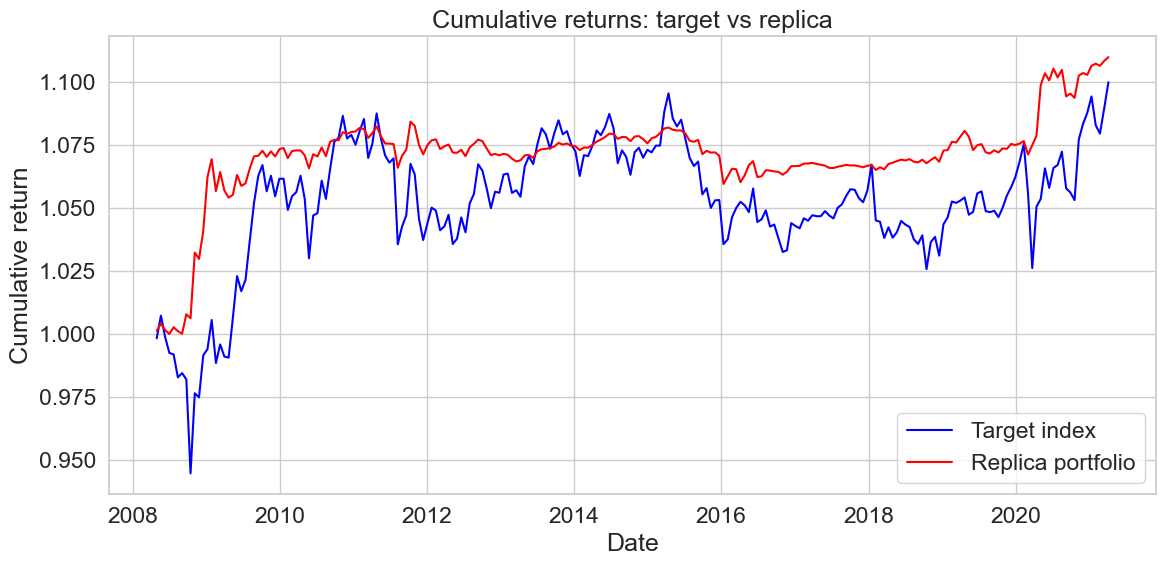

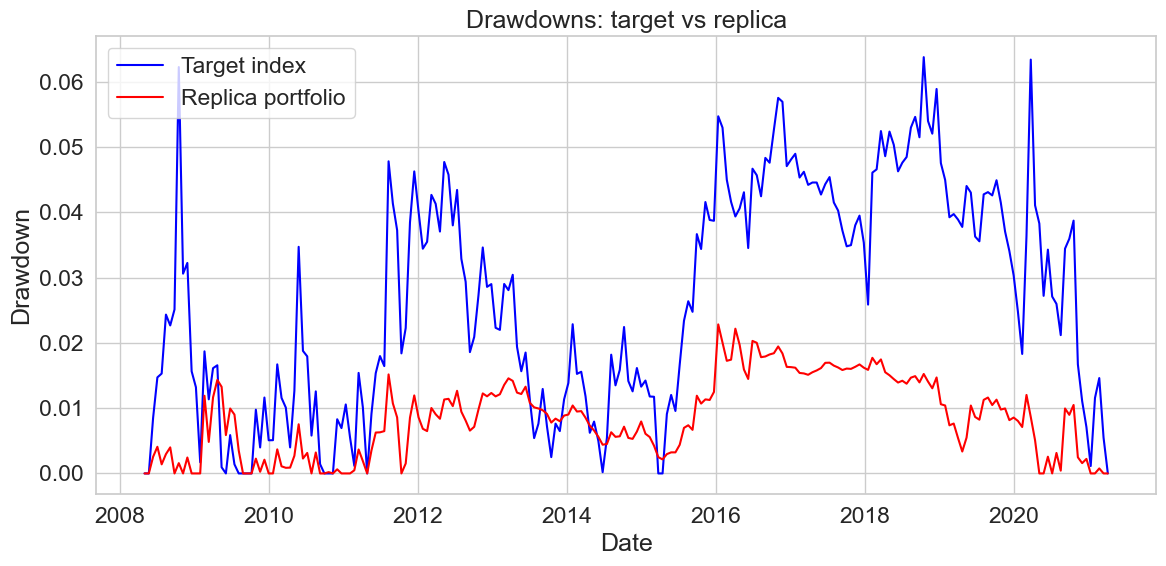

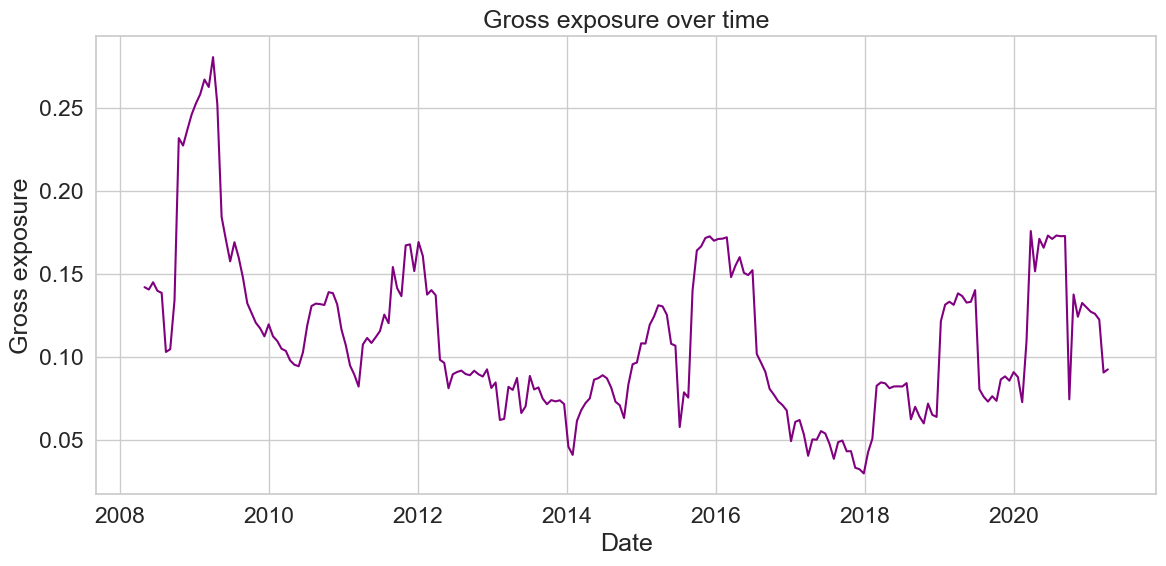

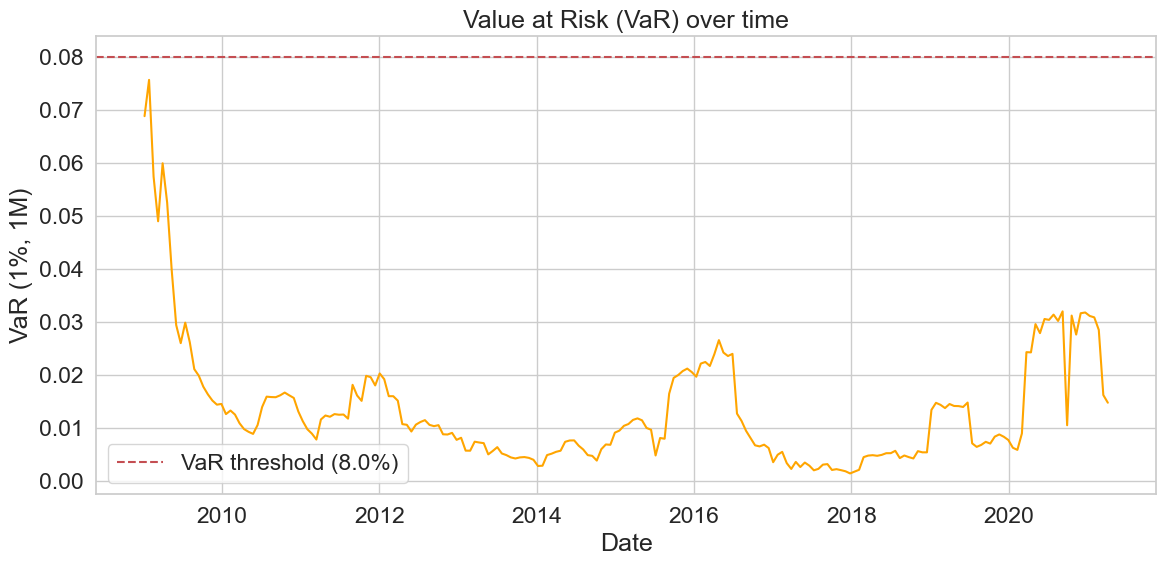

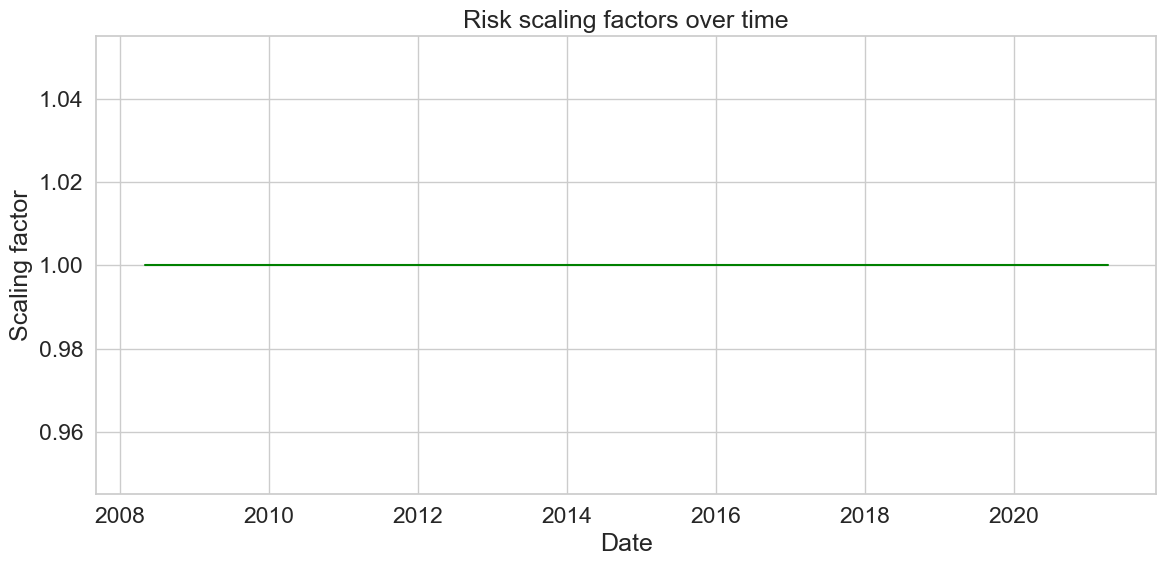

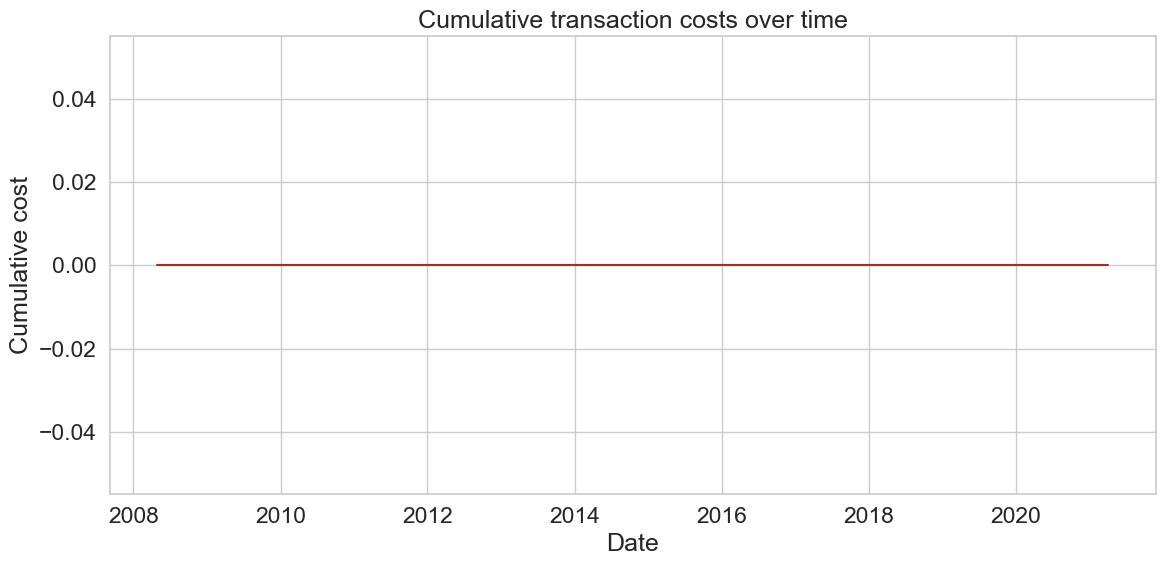

In [32]:
plot_metrics(best_config_normalized)

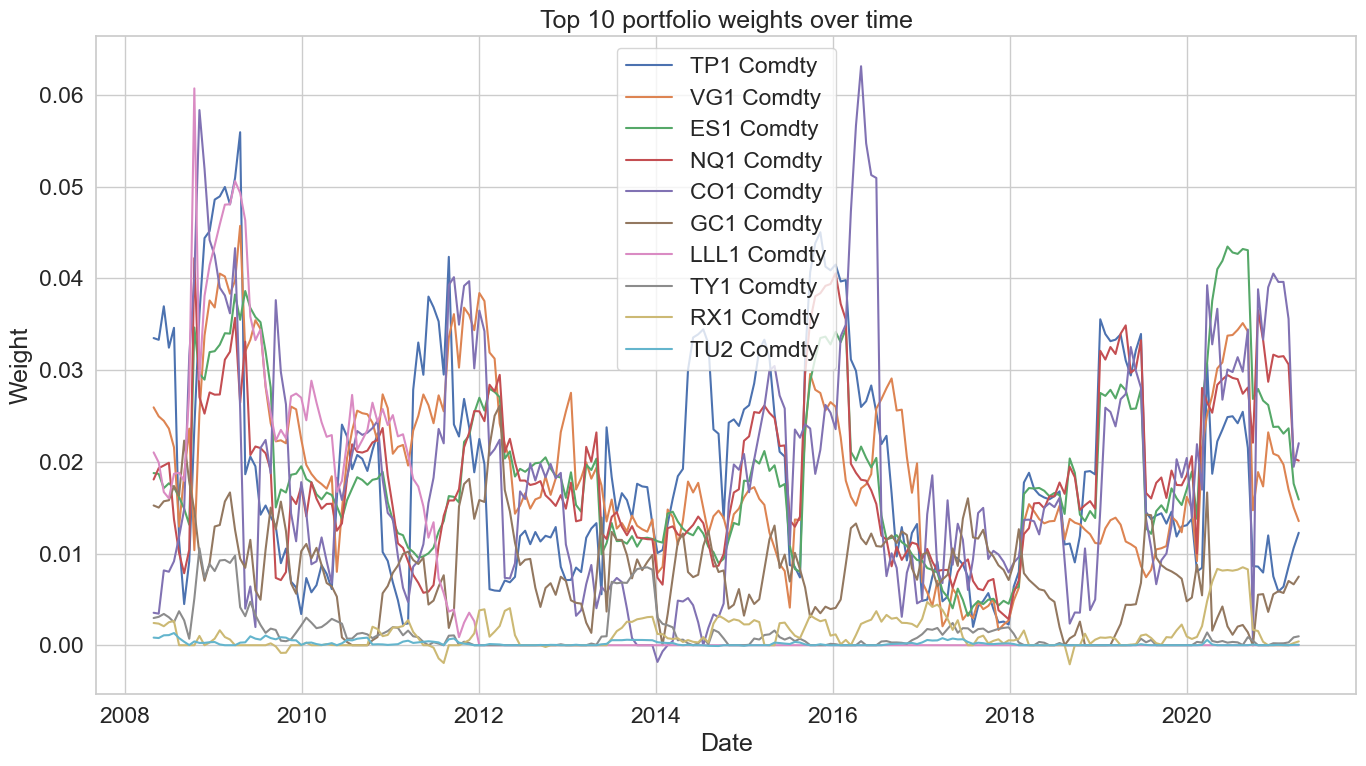

In [ ]:
# Plot weights over time
weights_history = best_config_normalized['weights_history']
weights_df = pd.DataFrame(weights_history, index=best_config_normalized['replica_returns'].index)

# Get the column names from the original futures data
weights_df.columns = X.columns

# Plot the top 10 weights by absolute average value
top_weights = weights_df.abs().mean().sort_values(ascending=False).head(10).index
plt.figure(figsize=(14, 8))
for col in top_weights:
    plt.plot(weights_df[col], label=col)
plt.title('Top 10 portfolio weights over time')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


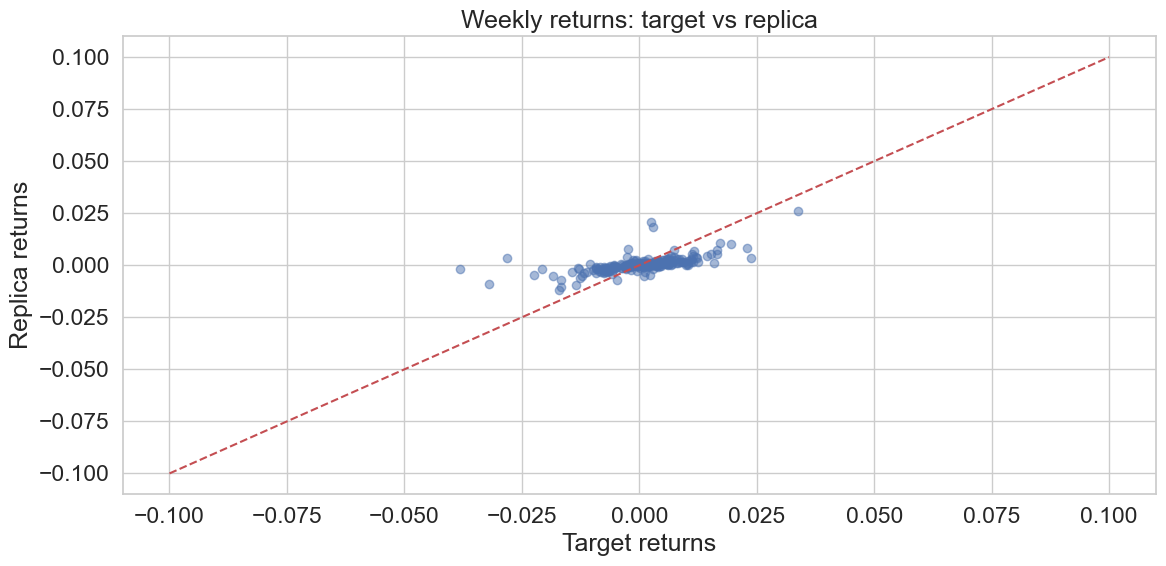

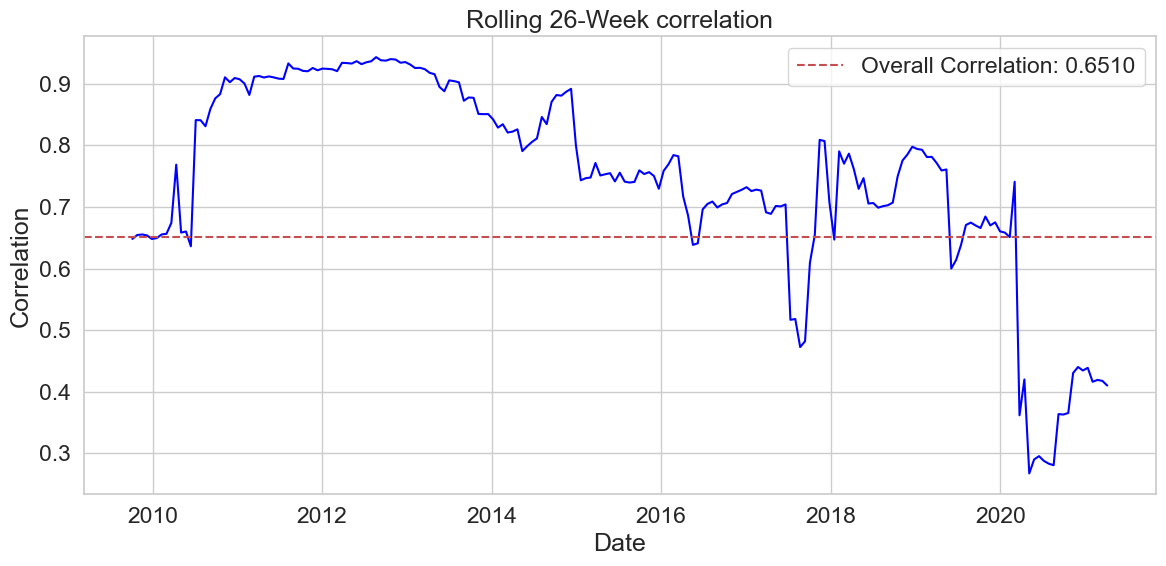

In [28]:
# Plot weekly returns
plt.figure(figsize=(12, 6))
plt.scatter(best_config_normalized['aligned_target'], best_config_normalized['replica_returns'], alpha=0.5)
plt.plot([-0.1, 0.1], [-0.1, 0.1], 'r--')  # Diagonal line
plt.title('Weekly returns: target vs replica')
plt.xlabel('Target returns')
plt.ylabel('Replica returns')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot rolling correlation
plt.figure(figsize=(12, 6))
rolling_corr = best_config_normalized['replica_returns'].rolling(window=26).corr(best_config_normalized['aligned_target'])
plt.plot(rolling_corr, color='blue')
plt.title('Rolling 26-Week correlation')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.axhline(y=best_config_normalized['correlation'], color='r', linestyle='--',
            label=f'Overall Correlation: {best_config_normalized["correlation"]:.4f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

